# Global Power Plant Project:

# Statement:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction : Make two prediction

1) Primary Fuel 2) capacity_mw

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
# Reading the csv file from dataset
df = pd.read_csv("Global_Power_Plant.csv")
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

dataset contains 907 rows and 27 columns

In [3]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [4]:
df.tail()

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
902            0.994875           233.59665               865.4   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  

[5 rows x 27 columns]

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
902            0.994875           233.59665               865.4   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  

[5 rows x 27 columns]

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
902            0.994875           233.59665               865.4   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  

[5 rows x 27 columns]

# EDA

In [5]:
# Checking the dimension of dataset 
df.shape

(907, 27)

(907, 27)

(907, 27)

the dataset contains 907 rows and 27 column

In [6]:
# Checking the type of dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

this dataset contains object and float data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

There are some null values present in some solumns.
other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019 and estimated_generation_gwh has all Nan values so i can drop these columns.
other_fuel2 has only one non null value which means all other values are NaN so this column also has nothing to do with my data training.

In [8]:
#Droping unnecessary columns
df = df.drop(["other_fuel3"],axis=1)
df = df.drop(["wepp_id"],axis=1)
df=df.drop(["generation_gwh_2013"],axis=1)
df=df.drop(["generation_gwh_2019"],axis=1)
df = df.drop(["estimated_generation_gwh"],axis=1)
df = df.drop(["other_fuel2"],axis=1)

In [9]:
#Checking unique values of each column
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

These are the number of unique values present in each columns.
country, country_long, year_of_capacity_data and generation_data_source has only one unique count which means all the values of the column are filled with NaN values so no need to keep all these columns unnecessarily. so i can drop these columns also

In [10]:
df = df.drop(["country"],axis=1)
df = df.drop(["country_long"],axis=1)
df = df.drop(["year_of_capacity_data"],axis=1)
df = df.drop(["generation_data_source"],axis=1)

In [11]:
df.head()

name   gppd_idnr  capacity_mw  latitude  longitude  \
0          ACME Solar Tower  WRI1020239          2.5   28.1839    73.2407   
1       ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663    74.6090   
2  AES Saurashtra Windfarms  WRI1026669         39.2   21.9038    69.3732   
3               AGARTALA GT  IND0000001        135.0   23.8712    91.3602   
4              AKALTARA TPP  IND0000002       1800.0   21.9603    82.4091   

  primary_fuel other_fuel1  commissioning_year                 owner  \
0        Solar         NaN              2011.0           Solar Paces   
1         Coal         NaN                 NaN  Ultratech Cement ltd   
2         Wind         NaN                 NaN                   AES   
3          Gas         NaN              2004.0                   NaN   
4         Coal         Oil              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory                  NaN   
1                                   WRI                  NaN   
2                                   WRI                  NaN   
3                                   WRI           617.789264   
4                                   WRI          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_gwh_2018  
0                  NaN  
1                  NaN  
2                  NaN  
3           626.239128  
4          7279.000000

name   gppd_idnr  capacity_mw  latitude  longitude  \
0          ACME Solar Tower  WRI1020239          2.5   28.1839    73.2407   
1       ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663    74.6090   
2  AES Saurashtra Windfarms  WRI1026669         39.2   21.9038    69.3732   
3               AGARTALA GT  IND0000001        135.0   23.8712    91.3602   
4              AKALTARA TPP  IND0000002       1800.0   21.9603    82.4091   

  primary_fuel other_fuel1  commissioning_year                 owner  \
0        Solar         NaN              2011.0           Solar Paces   
1         Coal         NaN                 NaN  Ultratech Cement ltd   
2         Wind         NaN                 NaN                   AES   
3          Gas         NaN              2004.0                   NaN   
4         Coal         Oil              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory                  NaN   
1                                   WRI                  NaN   
2                                   WRI                  NaN   
3                                   WRI           617.789264   
4                                   WRI          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_gwh_2018  
0                  NaN  
1                  NaN  
2                  NaN  
3           626.239128  
4          7279.000000

name   gppd_idnr  capacity_mw  latitude  longitude  \
0          ACME Solar Tower  WRI1020239          2.5   28.1839    73.2407   
1       ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663    74.6090   
2  AES Saurashtra Windfarms  WRI1026669         39.2   21.9038    69.3732   
3               AGARTALA GT  IND0000001        135.0   23.8712    91.3602   
4              AKALTARA TPP  IND0000002       1800.0   21.9603    82.4091   

  primary_fuel other_fuel1  commissioning_year                 owner  \
0        Solar         NaN              2011.0           Solar Paces   
1         Coal         NaN                 NaN  Ultratech Cement ltd   
2         Wind         NaN                 NaN                   AES   
3          Gas         NaN              2004.0                   NaN   
4         Coal         Oil              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory                  NaN   
1                                   WRI                  NaN   
2                                   WRI                  NaN   
3                                   WRI           617.789264   
4                                   WRI          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_gwh_2018  
0                  NaN  
1                  NaN  
2                  NaN  
3           626.239128  
4          7279.000000

In [12]:
#lets check the name column entries
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

Name column has unique names for each power plant so we can drop this column.

In [13]:
#lets check the gppd_idnr column entries
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

gppd_idnr also has all the values unique so let me drop it since it can not contribute to model training.

In [14]:
#lets check entries in source column
df["owner"].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

Owner also looks like an unnecessary column since keeping all owner names will never distrub or give inputs to my prediction so i think i have to drop this column. And url column also has no input for prediction ao i can this column as well.

In [15]:
#lets check entries in source column
df["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [16]:
#Droping unnecessary columns
df = df.drop(["name"],axis=1)
df = df.drop(["gppd_idnr"],axis=1)
df = df.drop(["url"],axis=1)
df = df.drop(["owner"],axis=1)

In [17]:
df.head()

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0          2.5   28.1839    73.2407        Solar         NaN   
1         98.0   24.7663    74.6090         Coal         NaN   
2         39.2   21.9038    69.3732         Wind         NaN   
3        135.0   23.8712    91.3602          Gas         NaN   
4       1800.0   21.9603    82.4091         Coal         Oil   

   commissioning_year                                source  \
0              2011.0  National Renewable Energy Laboratory   
1                 NaN                  Ultratech Cement ltd   
2                 NaN                                   CDM   
3              2004.0         Central Electricity Authority   
4              2015.0         Central Electricity Authority   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory                  NaN   
1                                   WRI                  NaN   
2                                   WRI                  NaN   
3                                   WRI           617.789264   
4                                   WRI          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_gwh_2018  
0                  NaN  
1                  NaN  
2                  NaN  
3           626.239128  
4          7279.000000

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0          2.5   28.1839    73.2407        Solar         NaN   
1         98.0   24.7663    74.6090         Coal         NaN   
2         39.2   21.9038    69.3732         Wind         NaN   
3        135.0   23.8712    91.3602          Gas         NaN   
4       1800.0   21.9603    82.4091         Coal         Oil   

   commissioning_year                                source  \
0              2011.0  National Renewable Energy Laboratory   
1                 NaN                  Ultratech Cement ltd   
2                 NaN                                   CDM   
3              2004.0         Central Electricity Authority   
4              2015.0         Central Electricity Authority   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory                  NaN   
1                                   WRI                  NaN   
2                                   WRI                  NaN   
3                                   WRI           617.789264   
4                                   WRI          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_gwh_2018  
0                  NaN  
1                  NaN  
2                  NaN  
3           626.239128  
4          7279.000000

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0          2.5   28.1839    73.2407        Solar         NaN   
1         98.0   24.7663    74.6090         Coal         NaN   
2         39.2   21.9038    69.3732         Wind         NaN   
3        135.0   23.8712    91.3602          Gas         NaN   
4       1800.0   21.9603    82.4091         Coal         Oil   

   commissioning_year                                source  \
0              2011.0  National Renewable Energy Laboratory   
1                 NaN                  Ultratech Cement ltd   
2                 NaN                                   CDM   
3              2004.0         Central Electricity Authority   
4              2015.0         Central Electricity Authority   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory                  NaN   
1                                   WRI                  NaN   
2                                   WRI                  NaN   
3                                   WRI           617.789264   
4                                   WRI          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_gwh_2018  
0                  NaN  
1                  NaN  
2                  NaN  
3           626.239128  
4          7279.000000

In [18]:
#Checking null values in the dataset
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

There are null values in all columns except capacity_mw, primary_fuel and source.

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

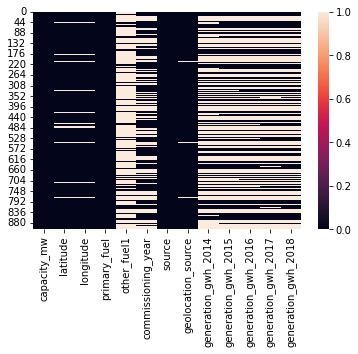

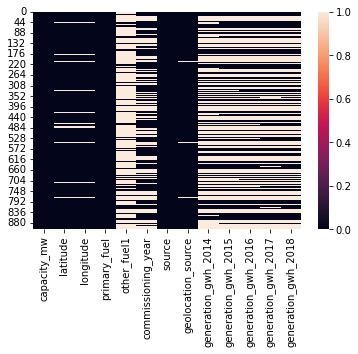

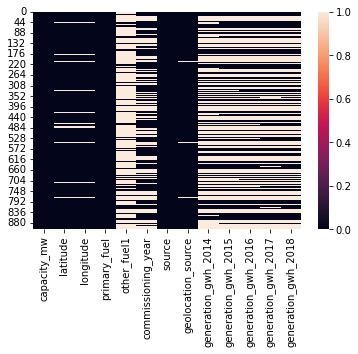

In [19]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

In [20]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

 in this Except latitude all other columns are skewed.So in all other numerical columns i have to replace the NaN values with median.In latitude column i can replace NaN by mean.

# Feature engineering:

In [21]:
#Lets extract Power_plant_age from commissioning_year by subtracting it from 2018
df['Power_plant_age'] = 2019 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)

# Treating null values using imputation techniques.

In [22]:
#Replacing NaN values in numerical columns
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["Power_plant_age"] = df["Power_plant_age"].fillna(df["Power_plant_age"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [23]:
#Replacing null values in categorical columns
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [24]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
Power_plant_age        0
dtype: int64

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
Power_plant_age        0
dtype: int64

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
Power_plant_age        0
dtype: int64

now no null values present in the dataset

In [25]:
df.head()

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0          2.5   28.1839    73.2407        Solar         Oil   
1         98.0   24.7663    74.6090         Coal         Oil   
2         39.2   21.9038    69.3732         Wind         Oil   
3        135.0   23.8712    91.3602          Gas         Oil   
4       1800.0   21.9603    82.4091         Coal         Oil   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           801.123775           711.181225           737.205450   
1           801.123775           711.181225           737.205450   
2           801.123775           711.181225           737.205450   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0           817.977250           751.644375              8.0  
1           817.977250           751.644375             18.0  
2           817.977250           751.644375             18.0  
3           663.774500           626.239128             15.0  
4          5385.579736          7279.000000              4.0

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0          2.5   28.1839    73.2407        Solar         Oil   
1         98.0   24.7663    74.6090         Coal         Oil   
2         39.2   21.9038    69.3732         Wind         Oil   
3        135.0   23.8712    91.3602          Gas         Oil   
4       1800.0   21.9603    82.4091         Coal         Oil   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           801.123775           711.181225           737.205450   
1           801.123775           711.181225           737.205450   
2           801.123775           711.181225           737.205450   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0           817.977250           751.644375              8.0  
1           817.977250           751.644375             18.0  
2           817.977250           751.644375             18.0  
3           663.774500           626.239128             15.0  
4          5385.579736          7279.000000              4.0

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0          2.5   28.1839    73.2407        Solar         Oil   
1         98.0   24.7663    74.6090         Coal         Oil   
2         39.2   21.9038    69.3732         Wind         Oil   
3        135.0   23.8712    91.3602          Gas         Oil   
4       1800.0   21.9603    82.4091         Coal         Oil   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           801.123775           711.181225           737.205450   
1           801.123775           711.181225           737.205450   
2           801.123775           711.181225           737.205450   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0           817.977250           751.644375              8.0  
1           817.977250           751.644375             18.0  
2           817.977250           751.644375             18.0  
3           663.774500           626.239128             15.0  
4          5385.579736          7279.000000              4.0

In [26]:
#Checking unique values of target column
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

these are the unique values present in the column

In [27]:
#Checking unique values of target column
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [28]:
#Checking for empty observations
df.loc[df['primary_fuel'] == " "]

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, other_fuel1, source, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, Power_plant_age]
Index: []

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, other_fuel1, source, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, Power_plant_age]
Index: []

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, other_fuel1, source, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, Power_plant_age]
Index: []

There is no empty observations in primary_fuel column.

In [29]:
#Checking for empty observations
df.loc[df['capacity_mw'] == " "]

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, other_fuel1, source, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, Power_plant_age]
Index: []

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, other_fuel1, source, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, Power_plant_age]
Index: []

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, other_fuel1, source, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, Power_plant_age]
Index: []

There is no empty observations in capacity_mw column also.

In [30]:
#Checking description of data set
df.describe()

capacity_mw    latitude   longitude  generation_gwh_2014  \
count   907.000000  907.000000  907.000000           907.000000   
mean    326.223755   21.197918   77.427103          1516.689956   
std     590.085456    6.079148    4.815073          2785.604307   
min       0.000000    8.168900   68.644700             0.000000   
25%      16.725000   17.072000   74.388900           801.123775   
50%      59.200000   21.281800   76.719500           801.123775   
75%     385.250000   25.176450   79.206100           801.123775   
max    4760.000000   34.649000   95.408000         28127.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count           907.000000           907.000000           907.000000   
mean           1510.071296          1565.361383          1657.121797   
std            2984.994556          3005.087210          3046.862910   
min               0.000000             0.000000             0.000000   
25%             711.181225           737.205450           817.977250   
50%             711.181225           737.205450           817.977250   
75%             711.181225           737.205450           817.977250   
max           30539.000000         30015.000000         35116.000000   

       generation_gwh_2018  Power_plant_age  
count           907.000000       907.000000  
mean           1665.011030        20.271224  
std            3168.826750        13.158621  
min               0.000000         1.000000  
25%             751.644375        16.000000  
50%             751.644375        18.000000  
75%             751.644375        21.000000  
max           35136.000000        92.000000

capacity_mw    latitude   longitude  generation_gwh_2014  \
count   907.000000  907.000000  907.000000           907.000000   
mean    326.223755   21.197918   77.427103          1516.689956   
std     590.085456    6.079148    4.815073          2785.604307   
min       0.000000    8.168900   68.644700             0.000000   
25%      16.725000   17.072000   74.388900           801.123775   
50%      59.200000   21.281800   76.719500           801.123775   
75%     385.250000   25.176450   79.206100           801.123775   
max    4760.000000   34.649000   95.408000         28127.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count           907.000000           907.000000           907.000000   
mean           1510.071296          1565.361383          1657.121797   
std            2984.994556          3005.087210          3046.862910   
min               0.000000             0.000000             0.000000   
25%             711.181225           737.205450           817.977250   
50%             711.181225           737.205450           817.977250   
75%             711.181225           737.205450           817.977250   
max           30539.000000         30015.000000         35116.000000   

       generation_gwh_2018  Power_plant_age  
count           907.000000       907.000000  
mean           1665.011030        20.271224  
std            3168.826750        13.158621  
min               0.000000         1.000000  
25%             751.644375        16.000000  
50%             751.644375        18.000000  
75%             751.644375        21.000000  
max           35136.000000        92.000000

capacity_mw    latitude   longitude  generation_gwh_2014  \
count   907.000000  907.000000  907.000000           907.000000   
mean    326.223755   21.197918   77.427103          1516.689956   
std     590.085456    6.079148    4.815073          2785.604307   
min       0.000000    8.168900   68.644700             0.000000   
25%      16.725000   17.072000   74.388900           801.123775   
50%      59.200000   21.281800   76.719500           801.123775   
75%     385.250000   25.176450   79.206100           801.123775   
max    4760.000000   34.649000   95.408000         28127.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count           907.000000           907.000000           907.000000   
mean           1510.071296          1565.361383          1657.121797   
std            2984.994556          3005.087210          3046.862910   
min               0.000000             0.000000             0.000000   
25%             711.181225           737.205450           817.977250   
50%             711.181225           737.205450           817.977250   
75%             711.181225           737.205450           817.977250   
max           30539.000000         30015.000000         35116.000000   

       generation_gwh_2018  Power_plant_age  
count           907.000000       907.000000  
mean           1665.011030        20.271224  
std            3168.826750        13.158621  
min               0.000000         1.000000  
25%             751.644375        16.000000  
50%             751.644375        18.000000  
75%             751.644375        21.000000  
max           35136.000000        92.000000

All the null values has been removed, so the count in all columns is same.
The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.
In some columns the difference is more between max and 75% so there are outliers present in most of the columns.

In [31]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


these are the categorical columns present in the dataset

In [32]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']
['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']
['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


these are the numerical columns present in the dataset

# DATA VISUALIZATION

# Univariate Analysis

# Plotting categorical columns

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


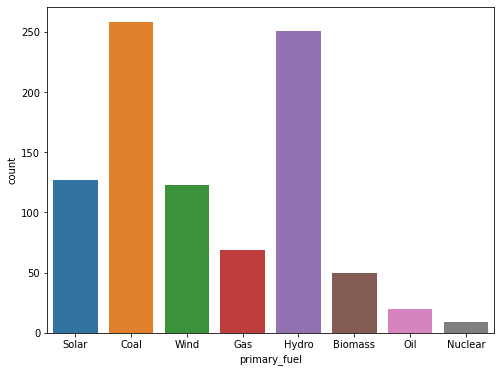

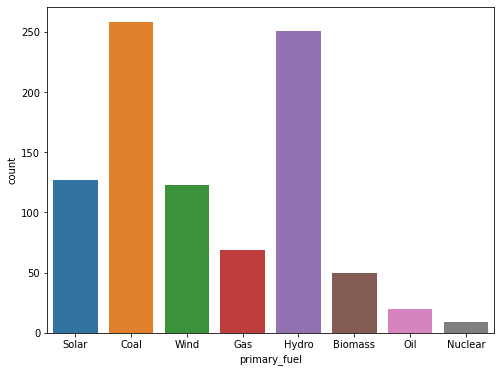

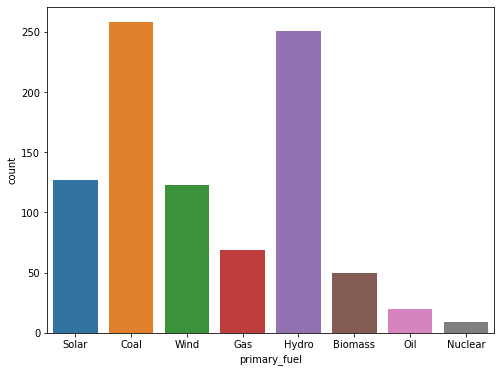

In [33]:
# Visualizing the types of fuel in primary_fuel
print(df["primary_fuel"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["primary_fuel"])
plt.show()

from the above   WE  can see that most of the plants in INDIA uses Coal and Hydro as there fuel.And very less plants uses Nuclear fuel.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64
Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64
Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


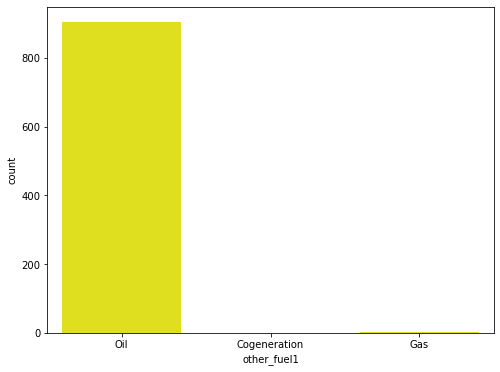

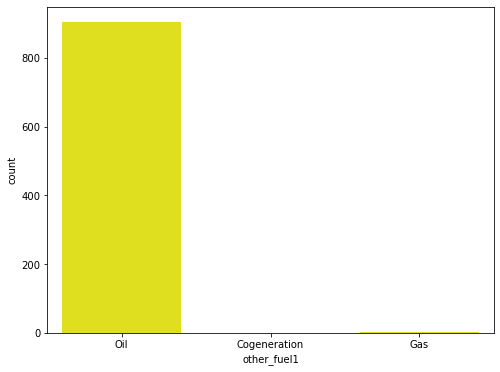

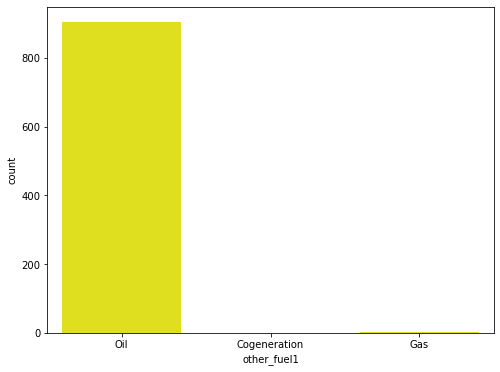

In [34]:
# Visualizing the counts of other fuel
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["other_fuel1"], color='yellow')
plt.show()

FROM THE above It seems most of the plants are using Oil as the other_fuel.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


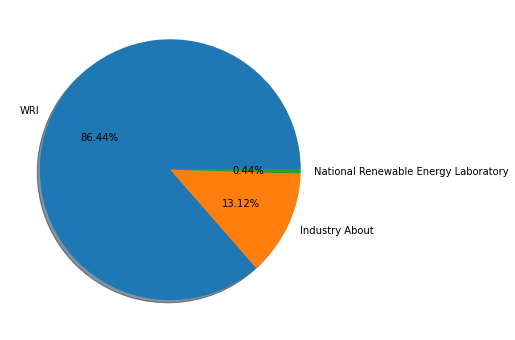

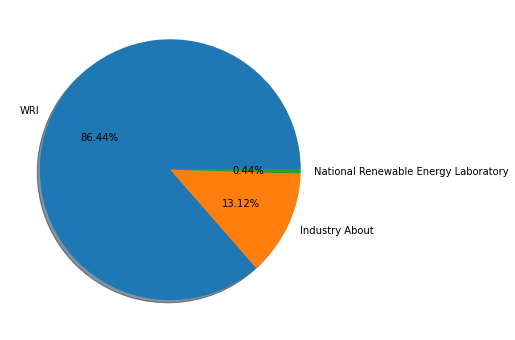

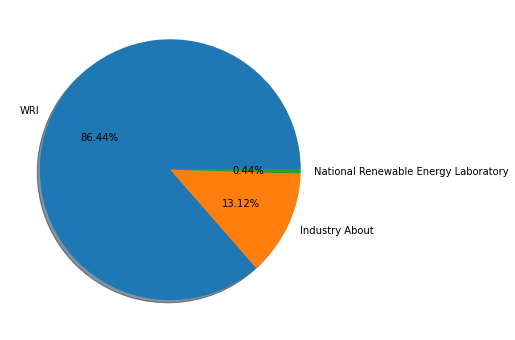

In [35]:
# Visualizing the counts of owner
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

from the above It shows that maximum power plants source is WRI.And very less plants has National Renewable Energy Laboratory as source.

# Plotting numerical columns

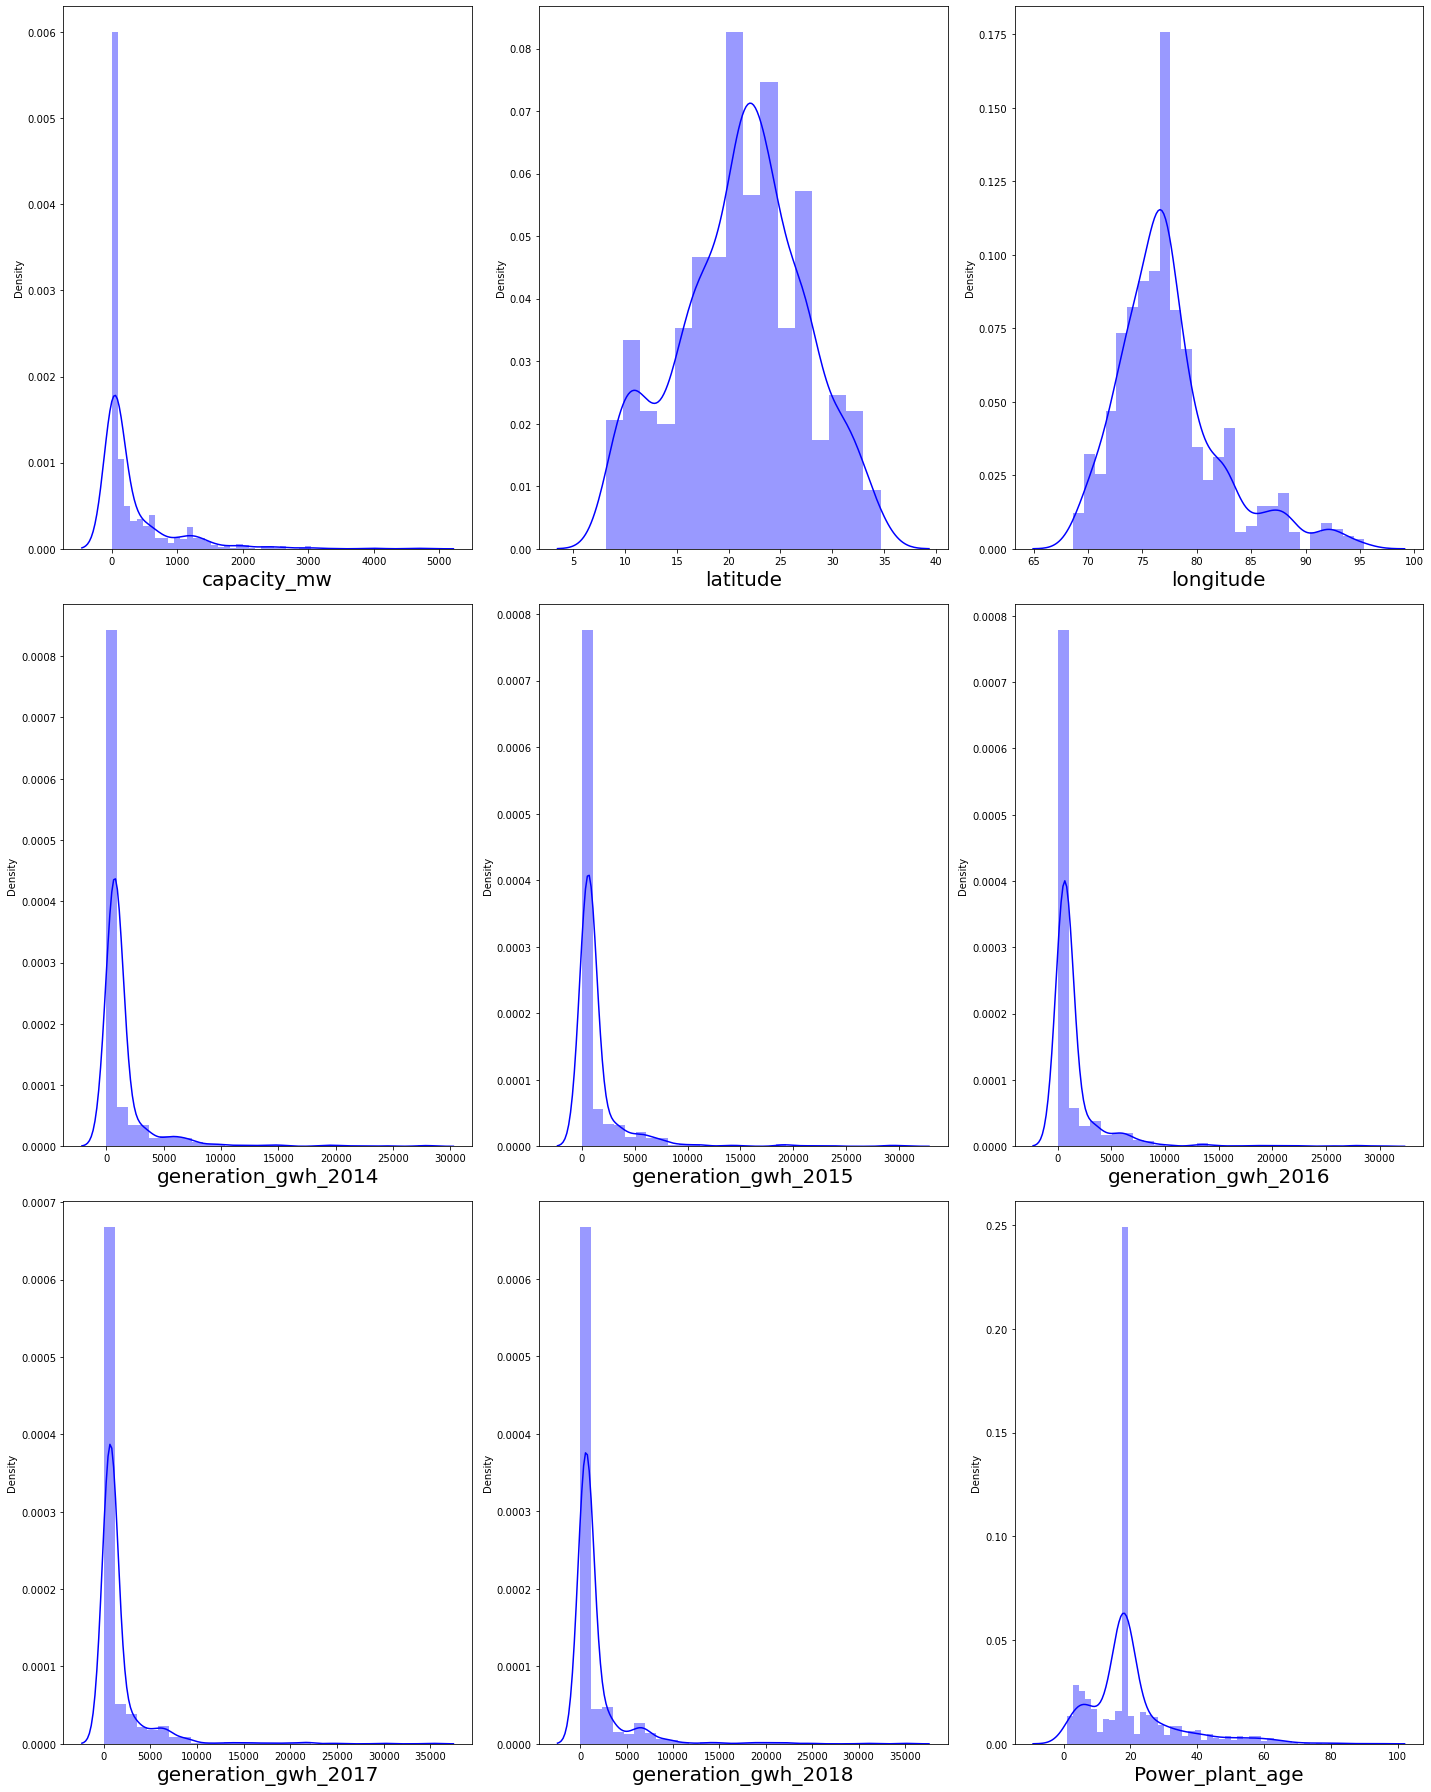

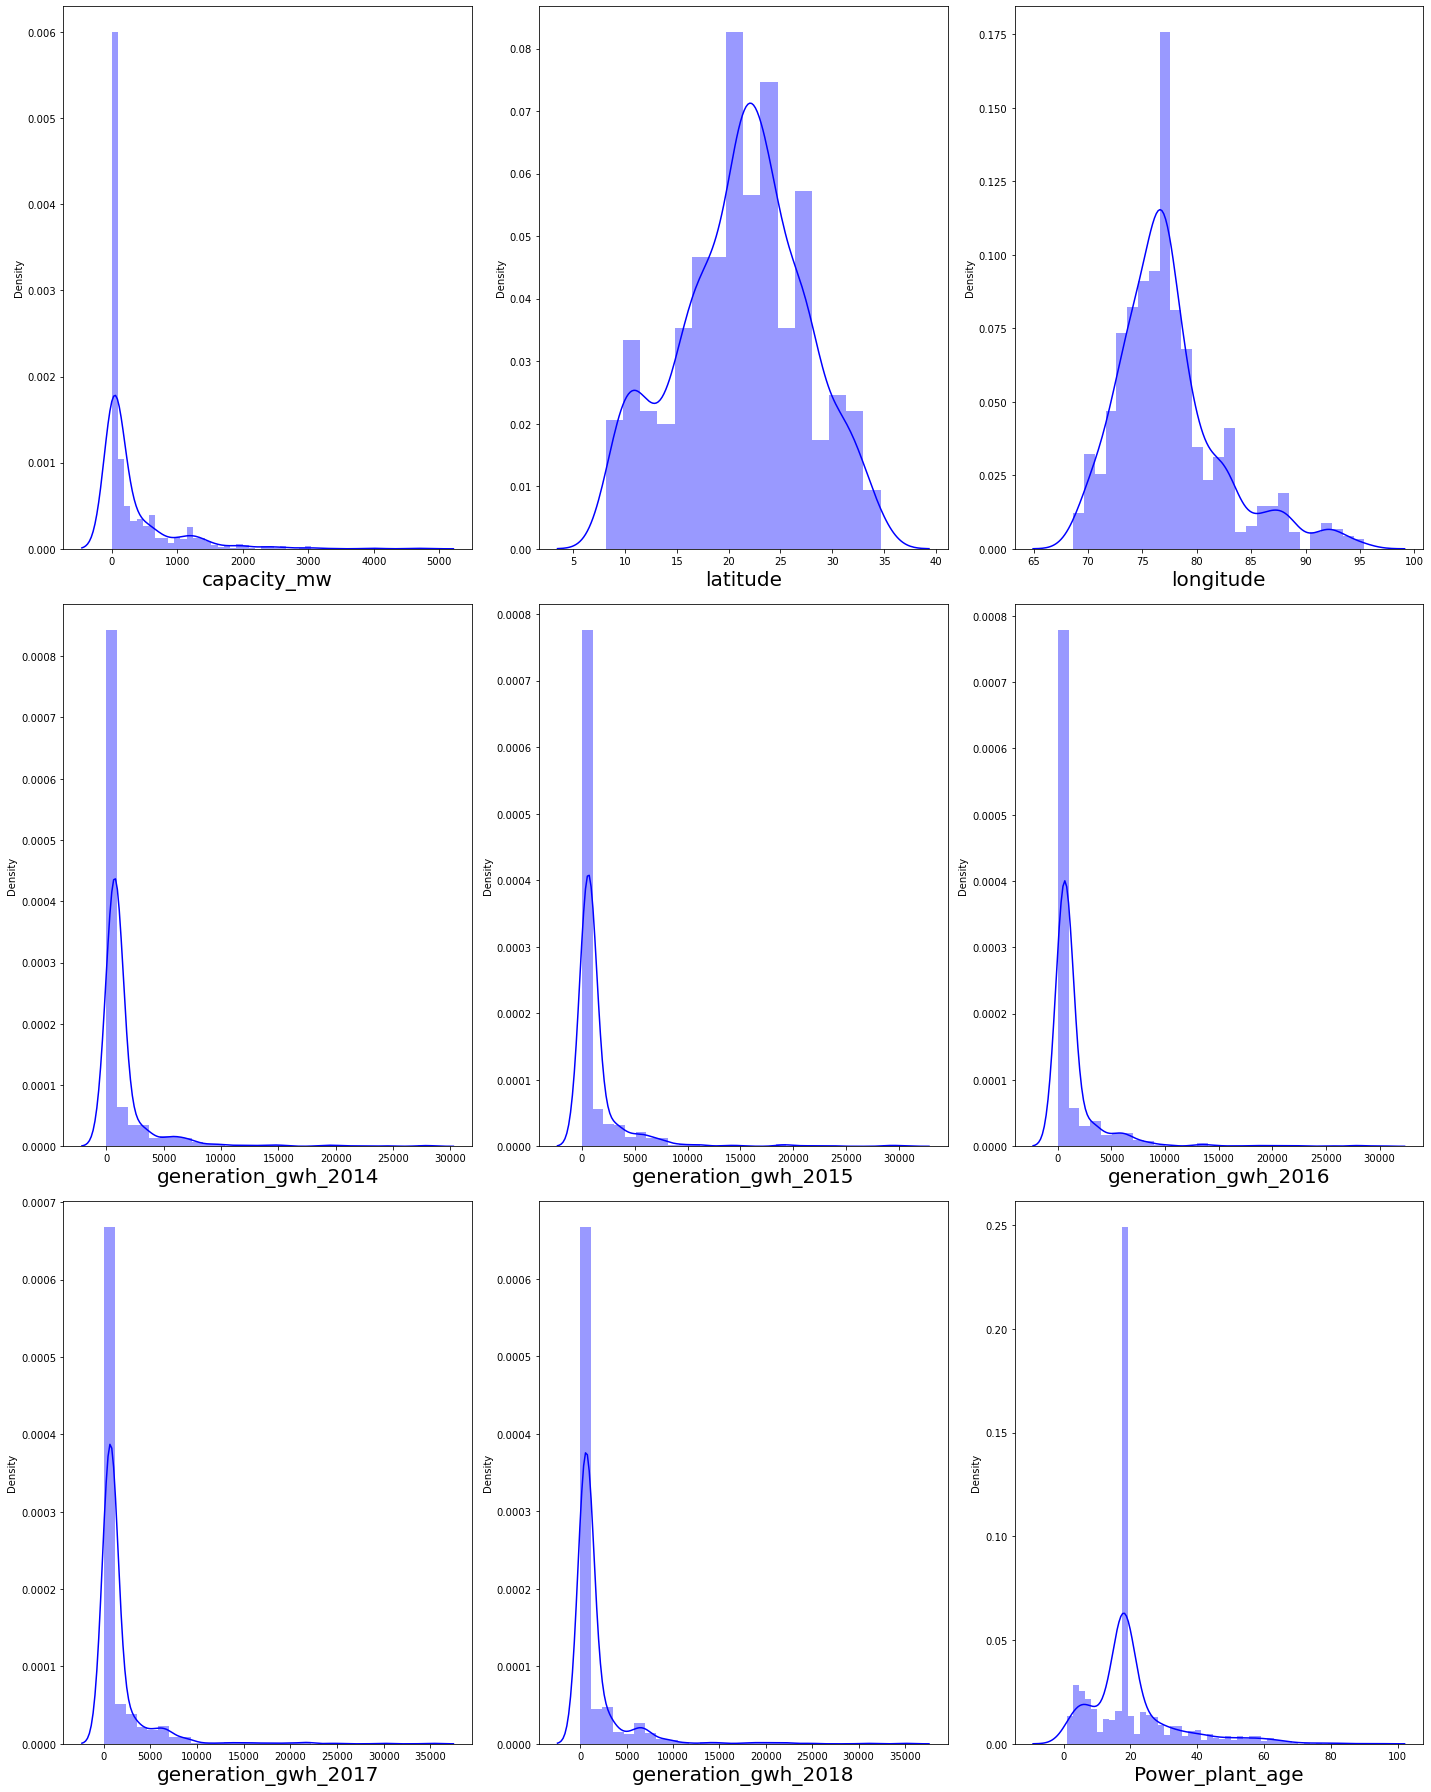

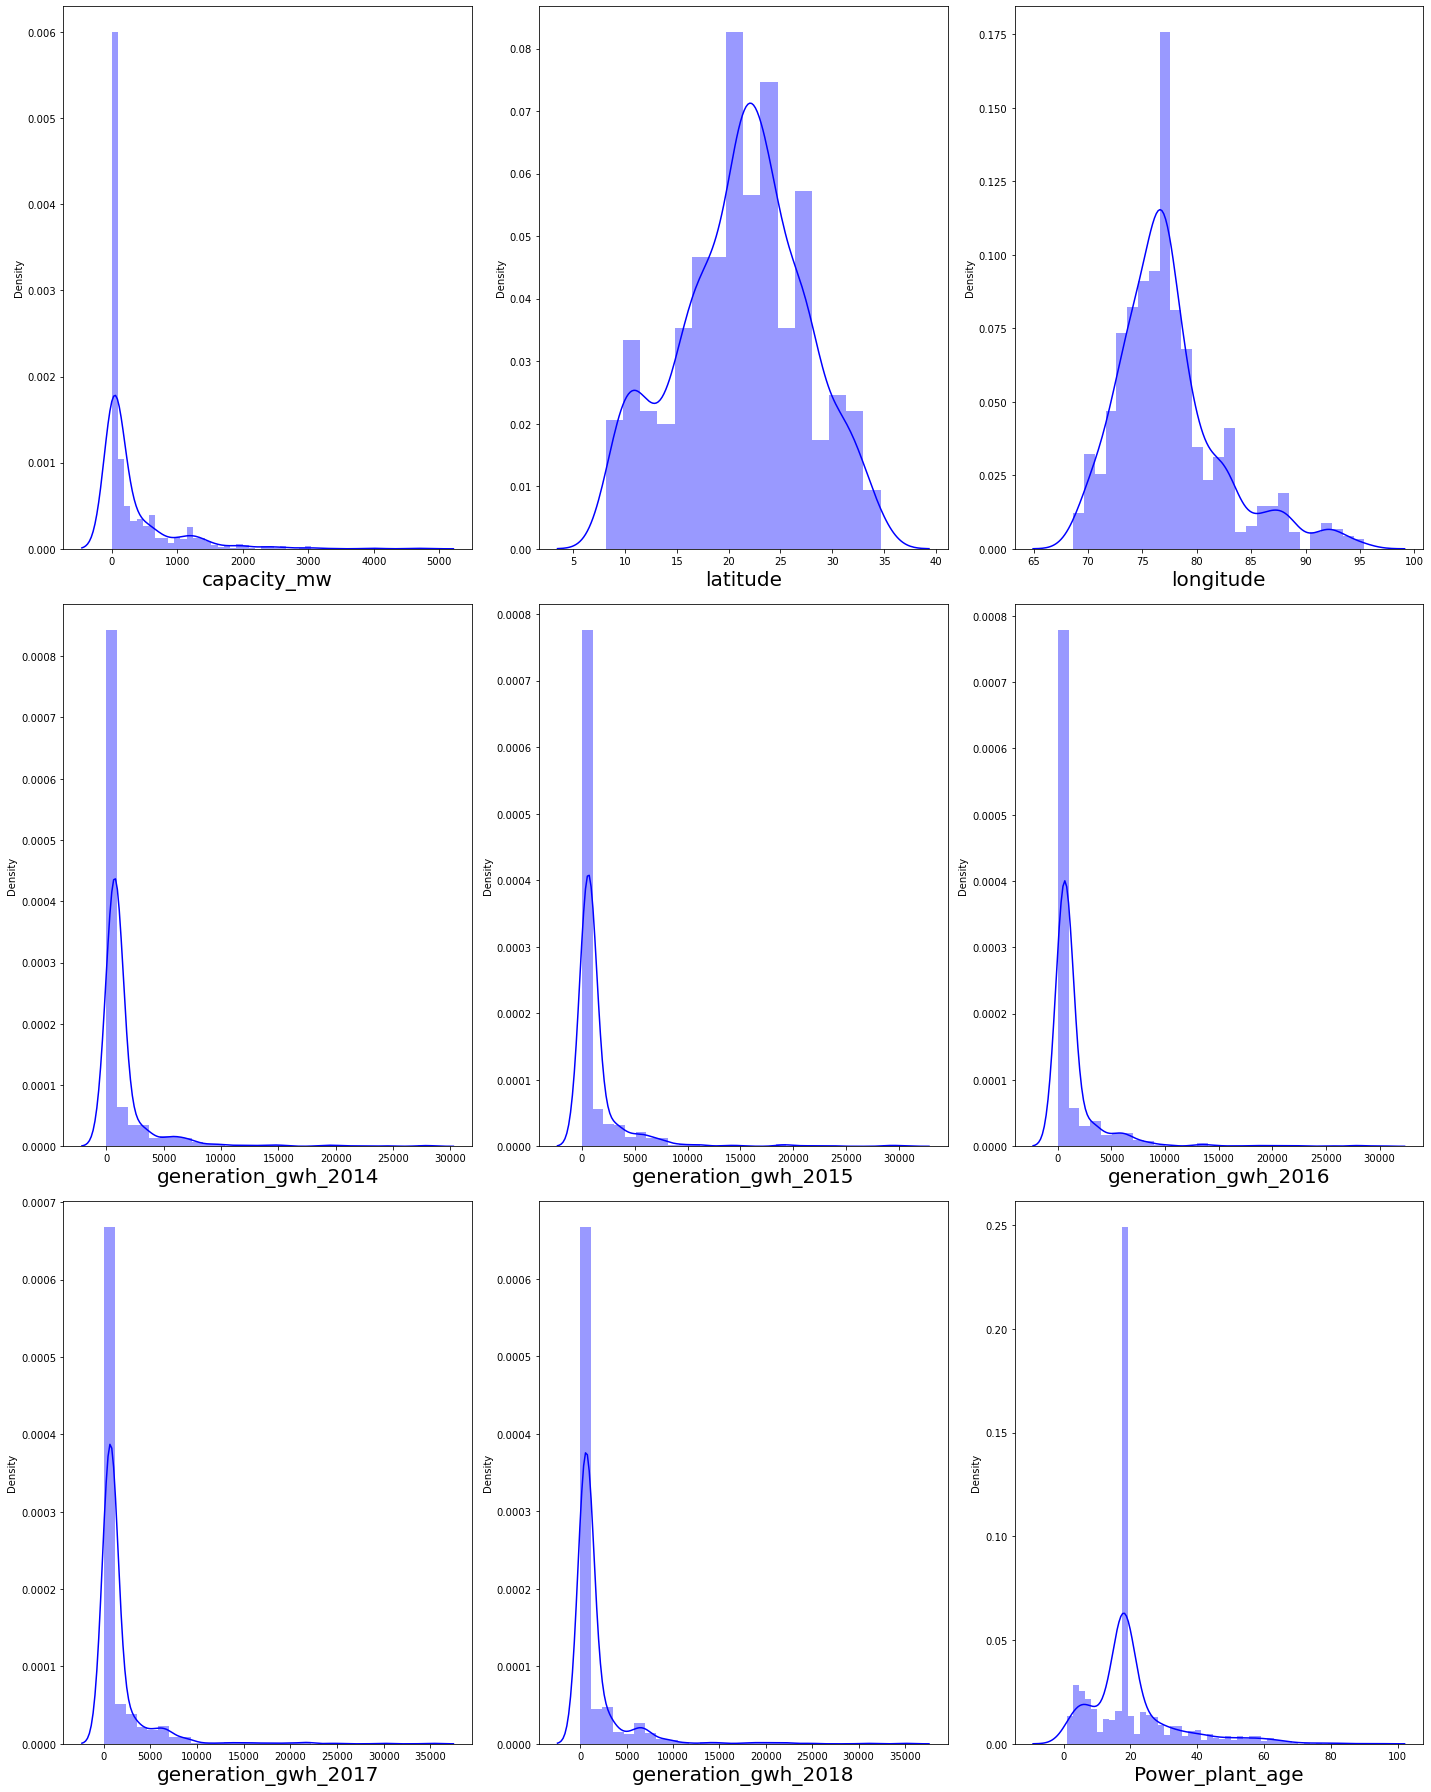

In [36]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="blue")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

from the above distribution plots we can observe that the data is not normally distributed in all the columns except latitude.

# Bivariate Analysis

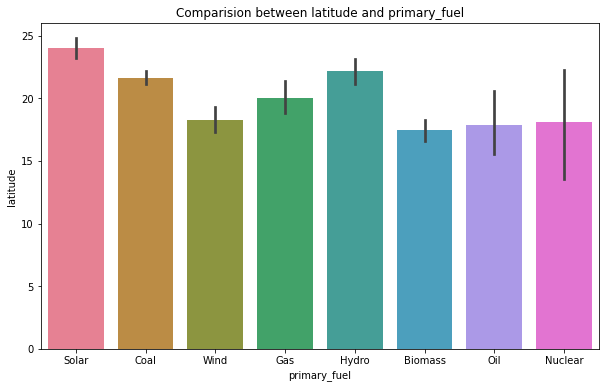

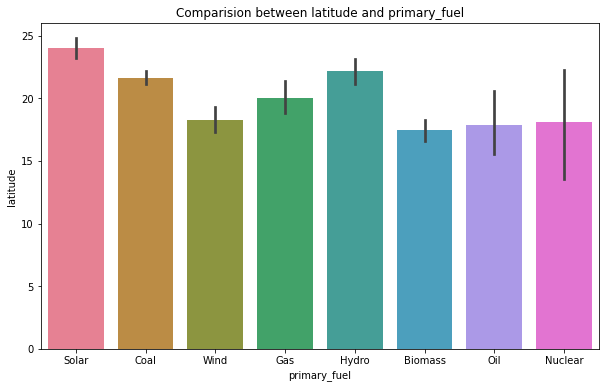

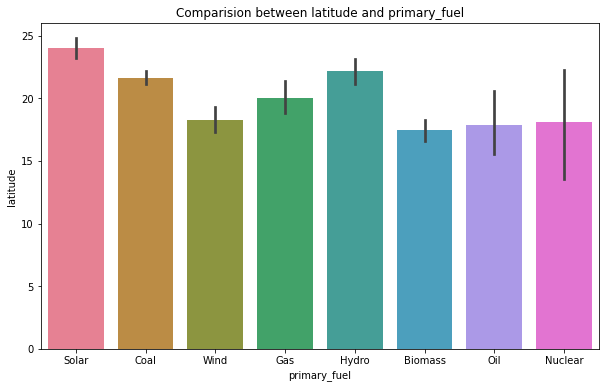

In [37]:
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and primary_fuel')
sns.barplot(df['primary_fuel'],df["latitude"],palette="husl");

from the above The fuel type Solar has high latitude followed by Hydro, Coal and Gas and remaining sources.

<AxesSubplot:xlabel='primary_fuel', ylabel='geolocation_source'>

<AxesSubplot:xlabel='primary_fuel', ylabel='geolocation_source'>

<AxesSubplot:xlabel='primary_fuel', ylabel='geolocation_source'>

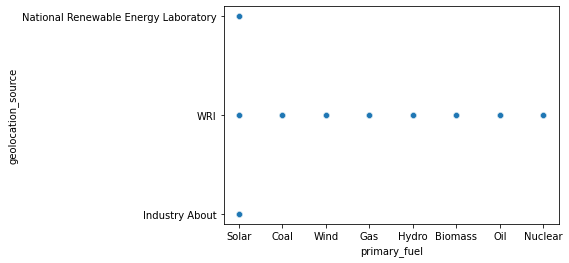

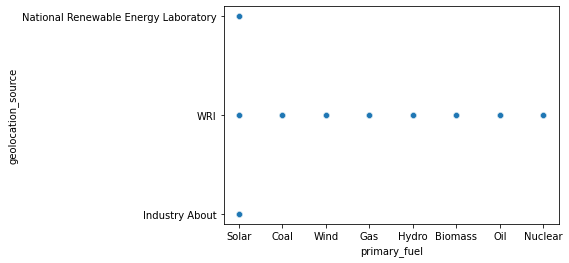

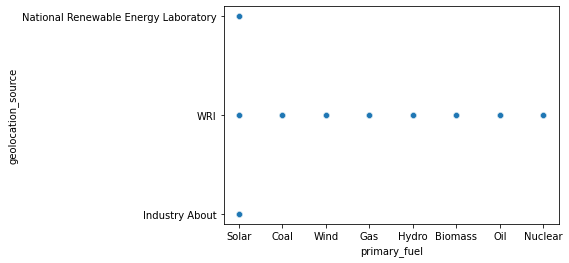

In [38]:
sns.scatterplot(x='primary_fuel',y='geolocation_source',data=df,palette="husl")

from the above geolocation_source= WRI has all the types of fuels used but Industry About and National Renewable Energy Laboratory has only solar as fuel.

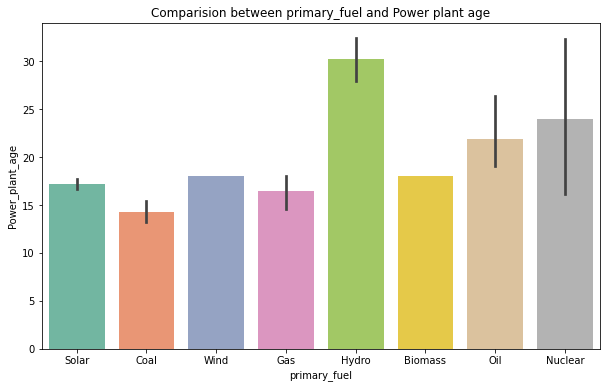

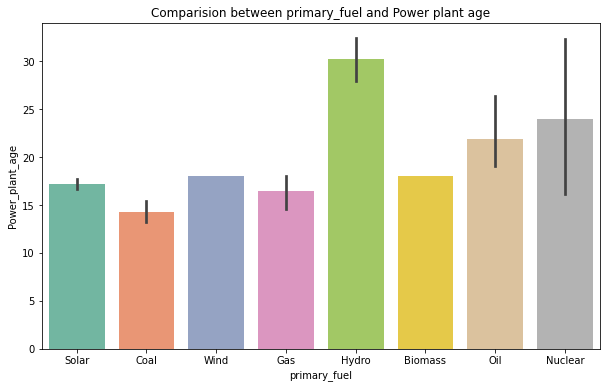

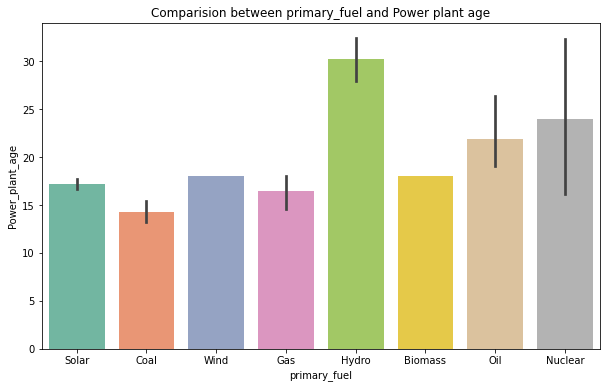

In [39]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age")
sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
plt.show()

Hydro,Nuclear and Oil fuels are old power plants.
and solar and coal fuels are recently added ones.

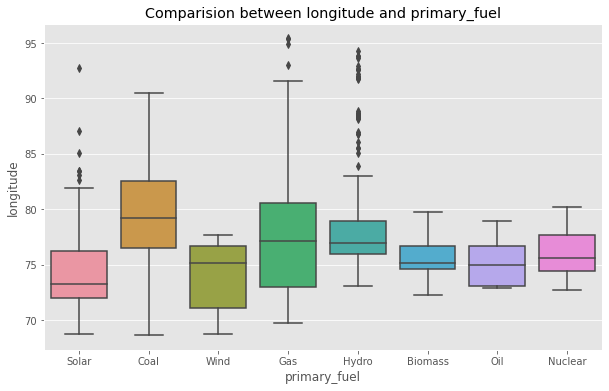

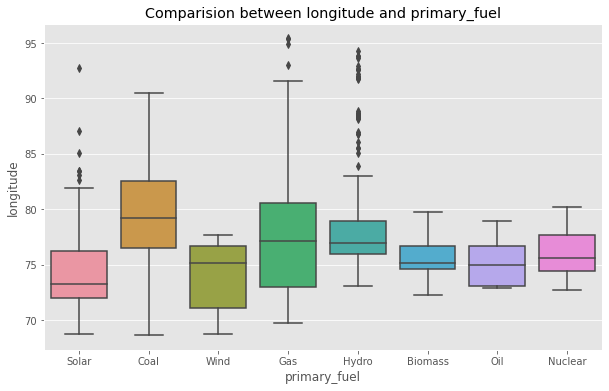

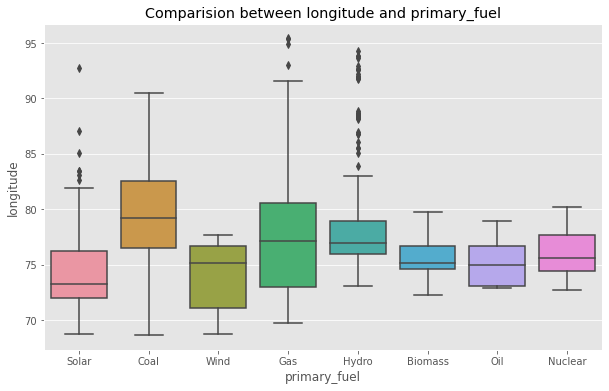

In [40]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
sns.boxplot(df['primary_fuel'],df["longitude"]);

The primary_fuel has high longitude followed by Hydro, Solar and Coal. Other fuel types have very less longitude.

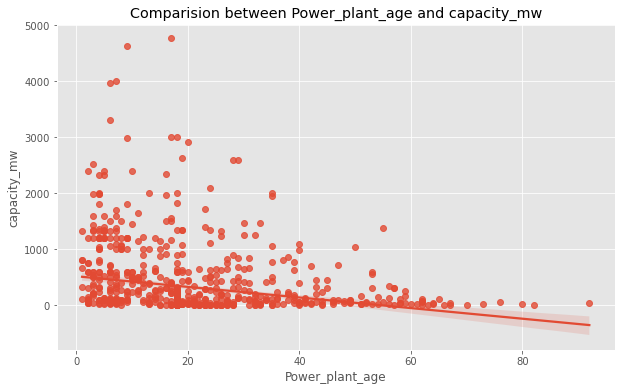

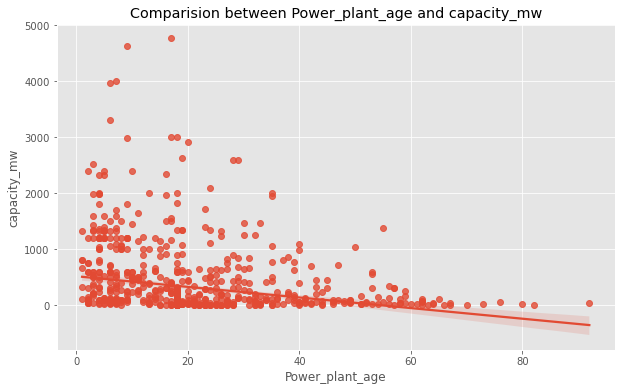

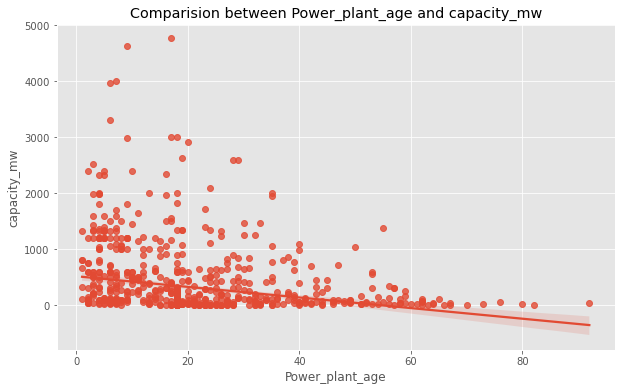

In [41]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw']);

From the plot we can observe that there is negative linear relationship between feature and label also we can infer that the capacity of older power plants is very less compared to the power plants which are started recently.

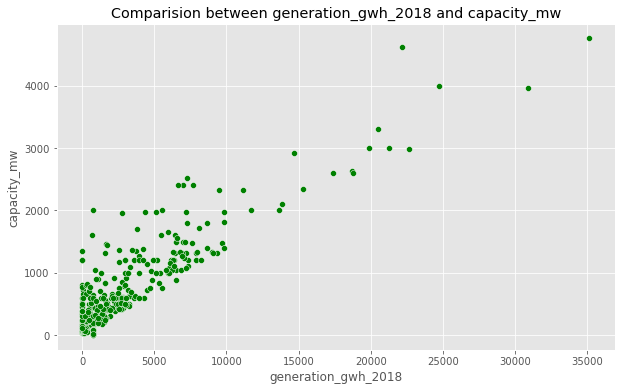

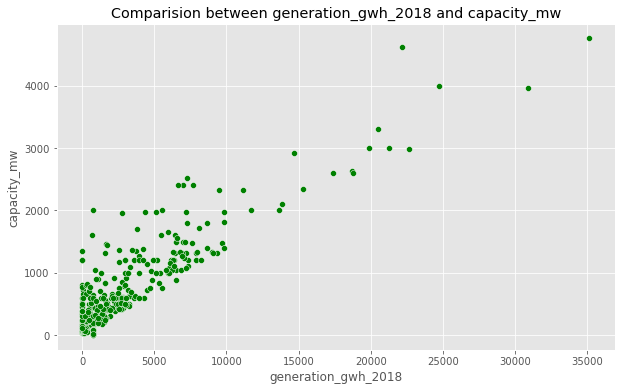

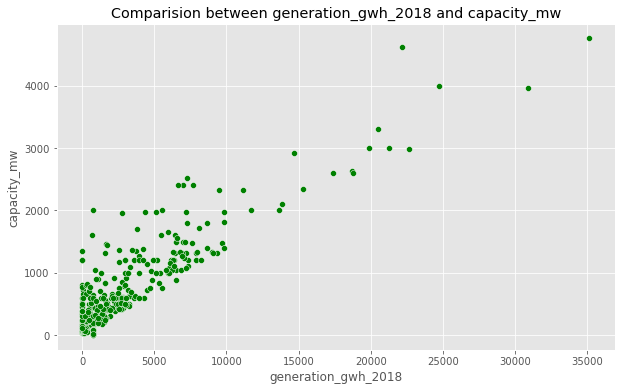

In [42]:
#Lets check the capacity of the plant in generation_gwh_2013
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2018 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2018", y = "capacity_mw", data = df,color="g")
plt.show()

We can notice the linear relationship between the feature and the label. Here the electricity generation reported for the year 2018 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

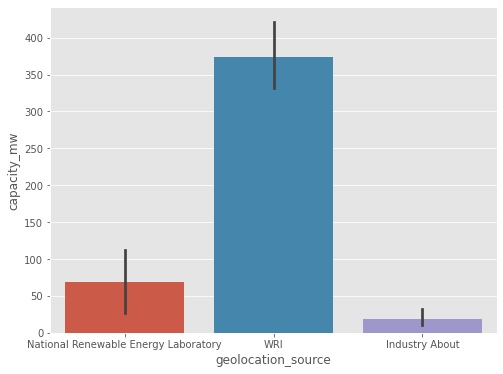

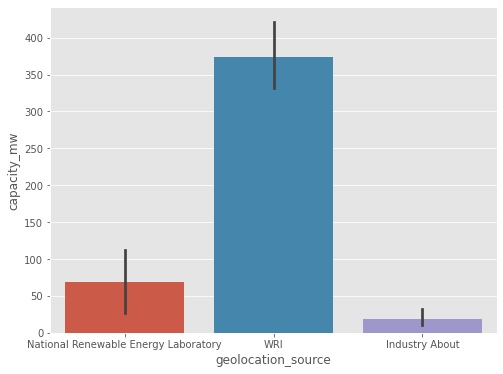

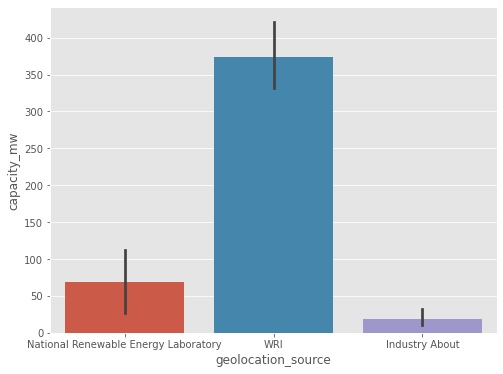

In [43]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (8,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

The capacity of geolocation source WRI is maximum which has capacity more tahn 350 mega watts. The geolacation source Industry About has less capacity.

# checking the relation between targets

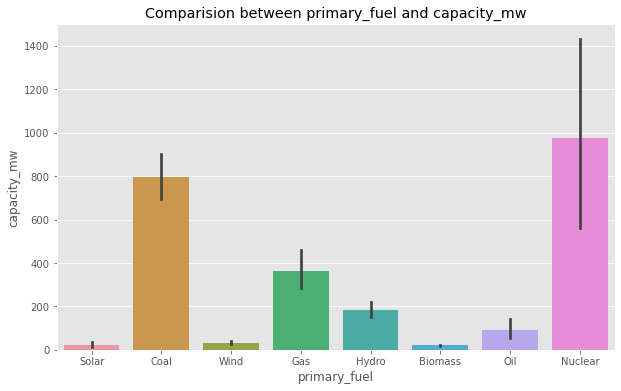

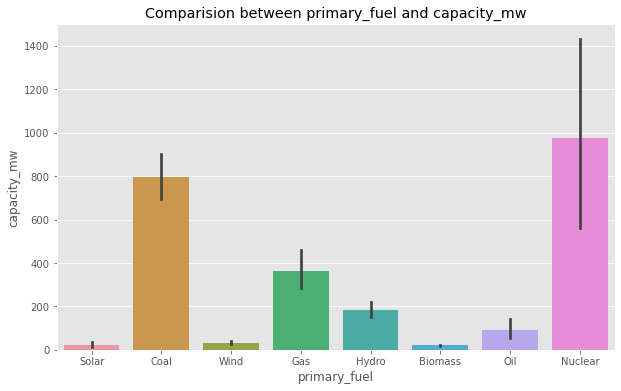

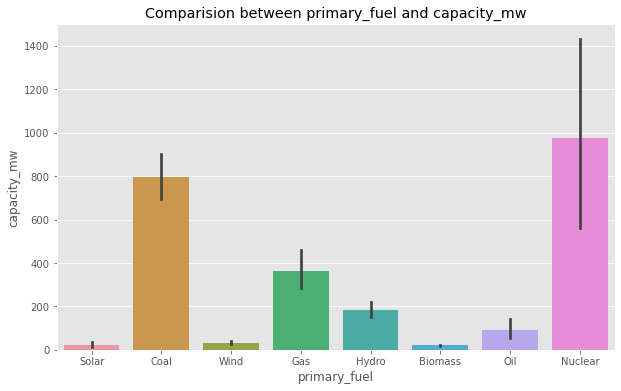

In [44]:
#Lets check the relation between Fuel Type and capacity_mw
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

from the above The plant which uses Nuclear and Coal as fuel has more capacity than other plants uses other fuels.

# MULTIVARIATE ANALYSIS

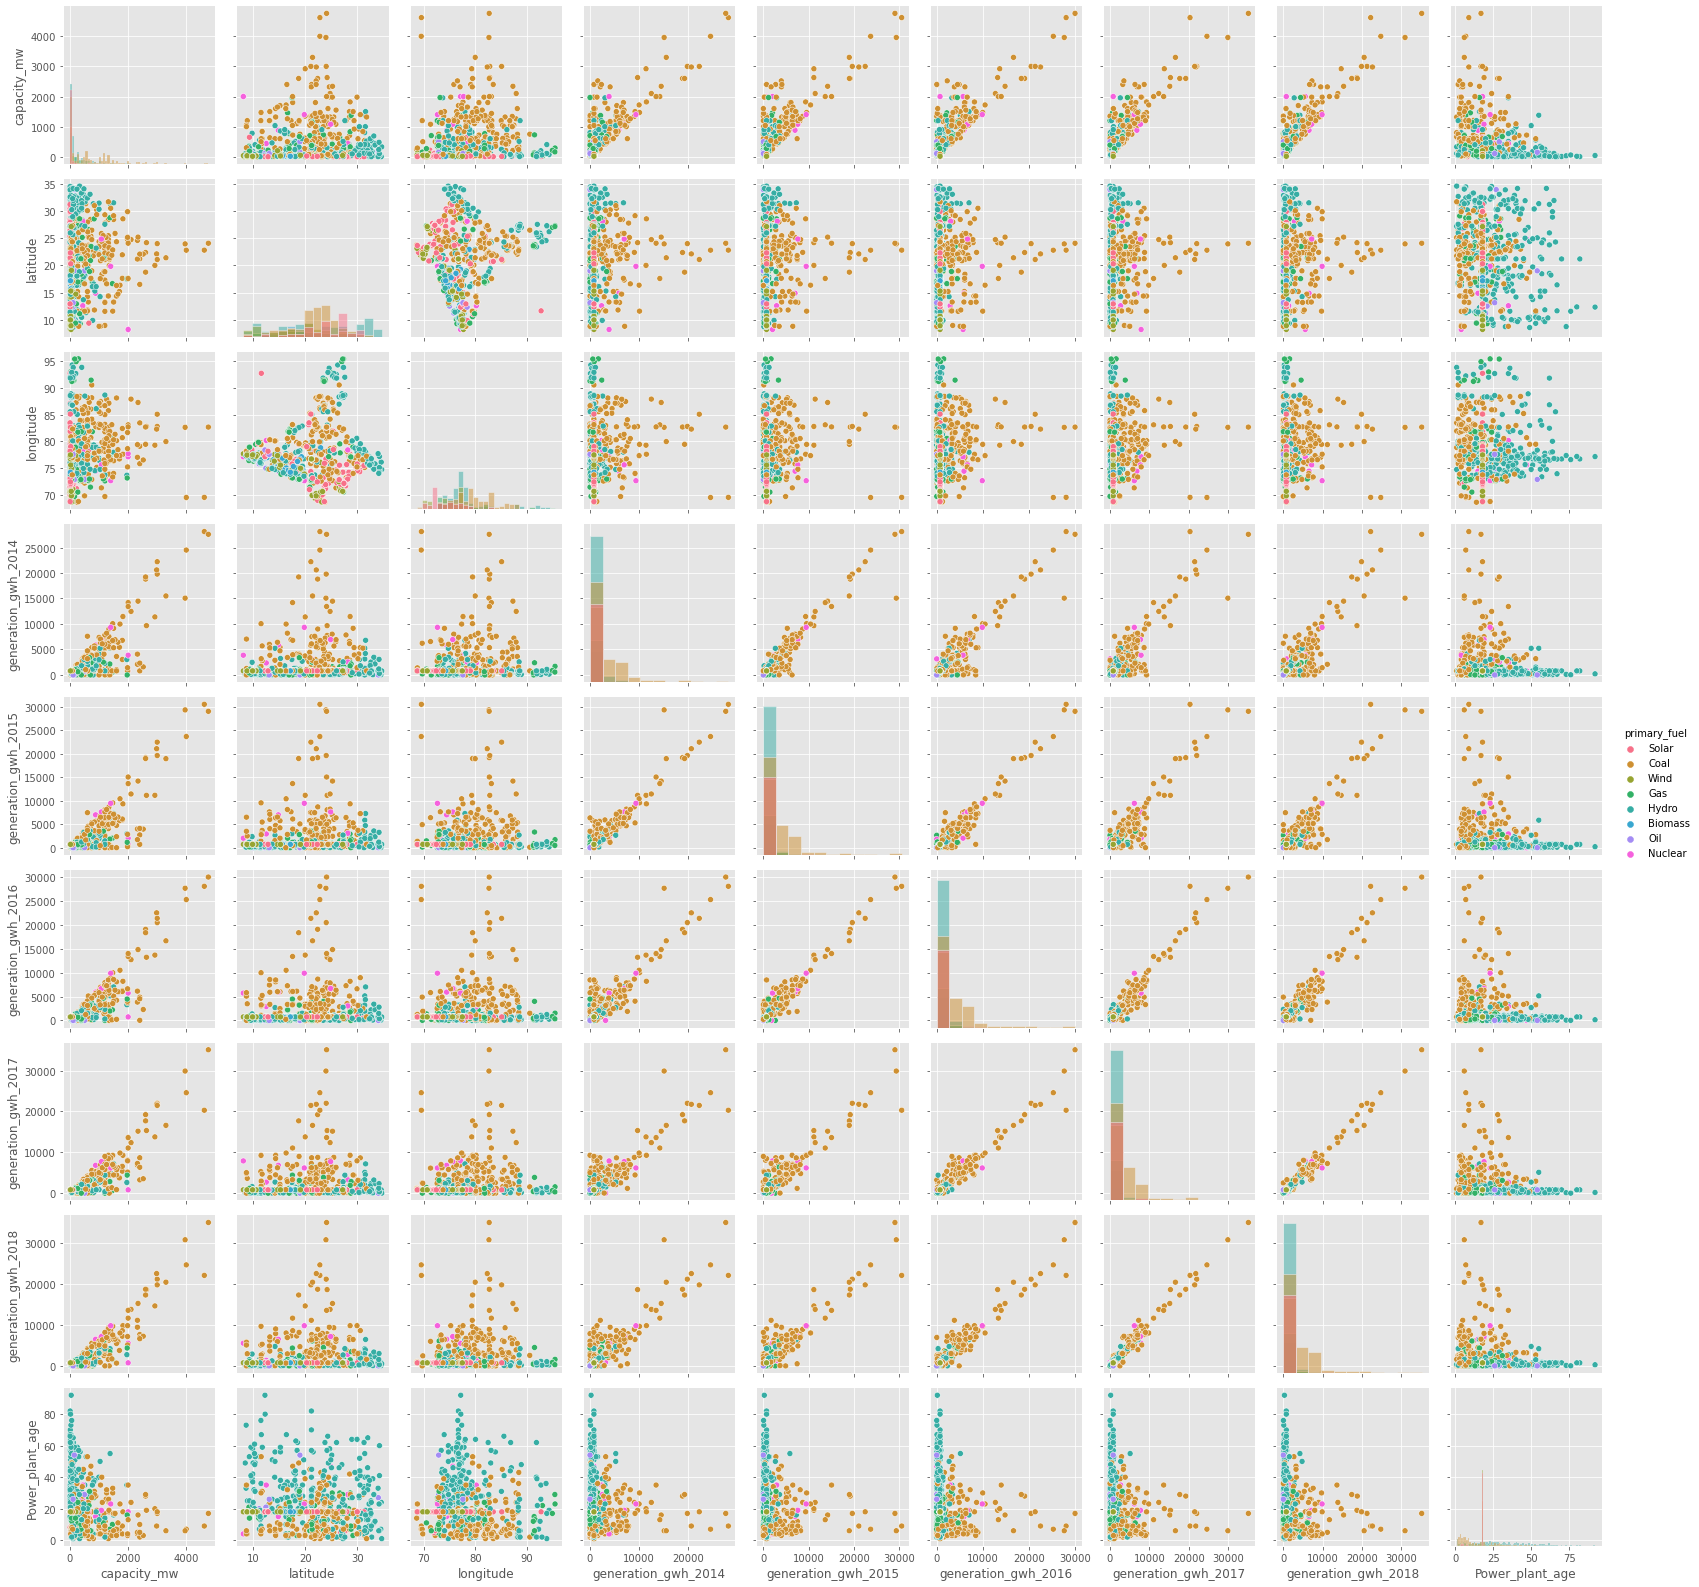

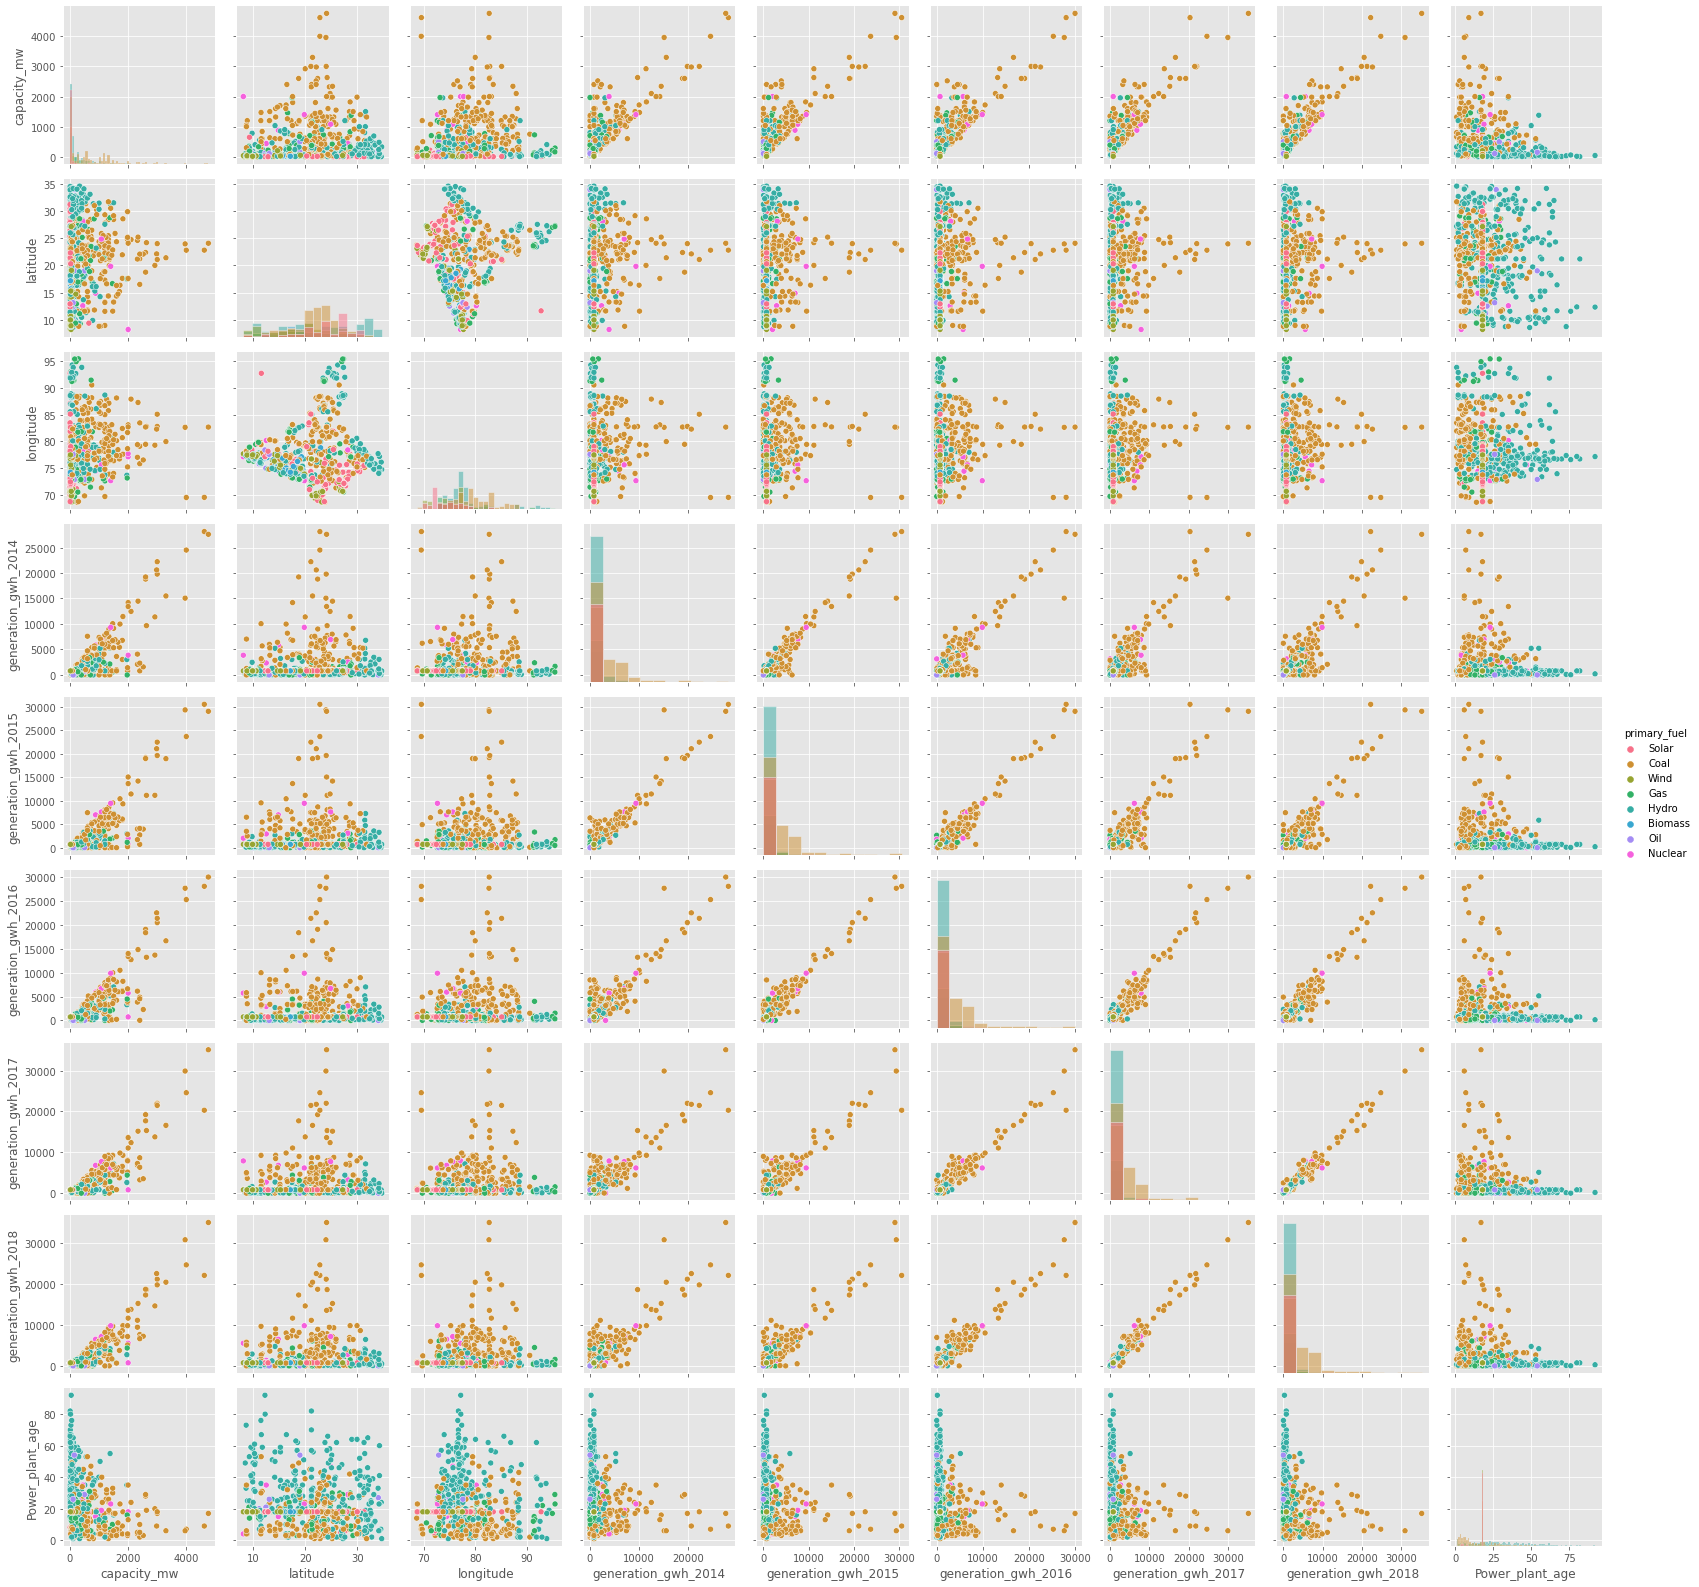

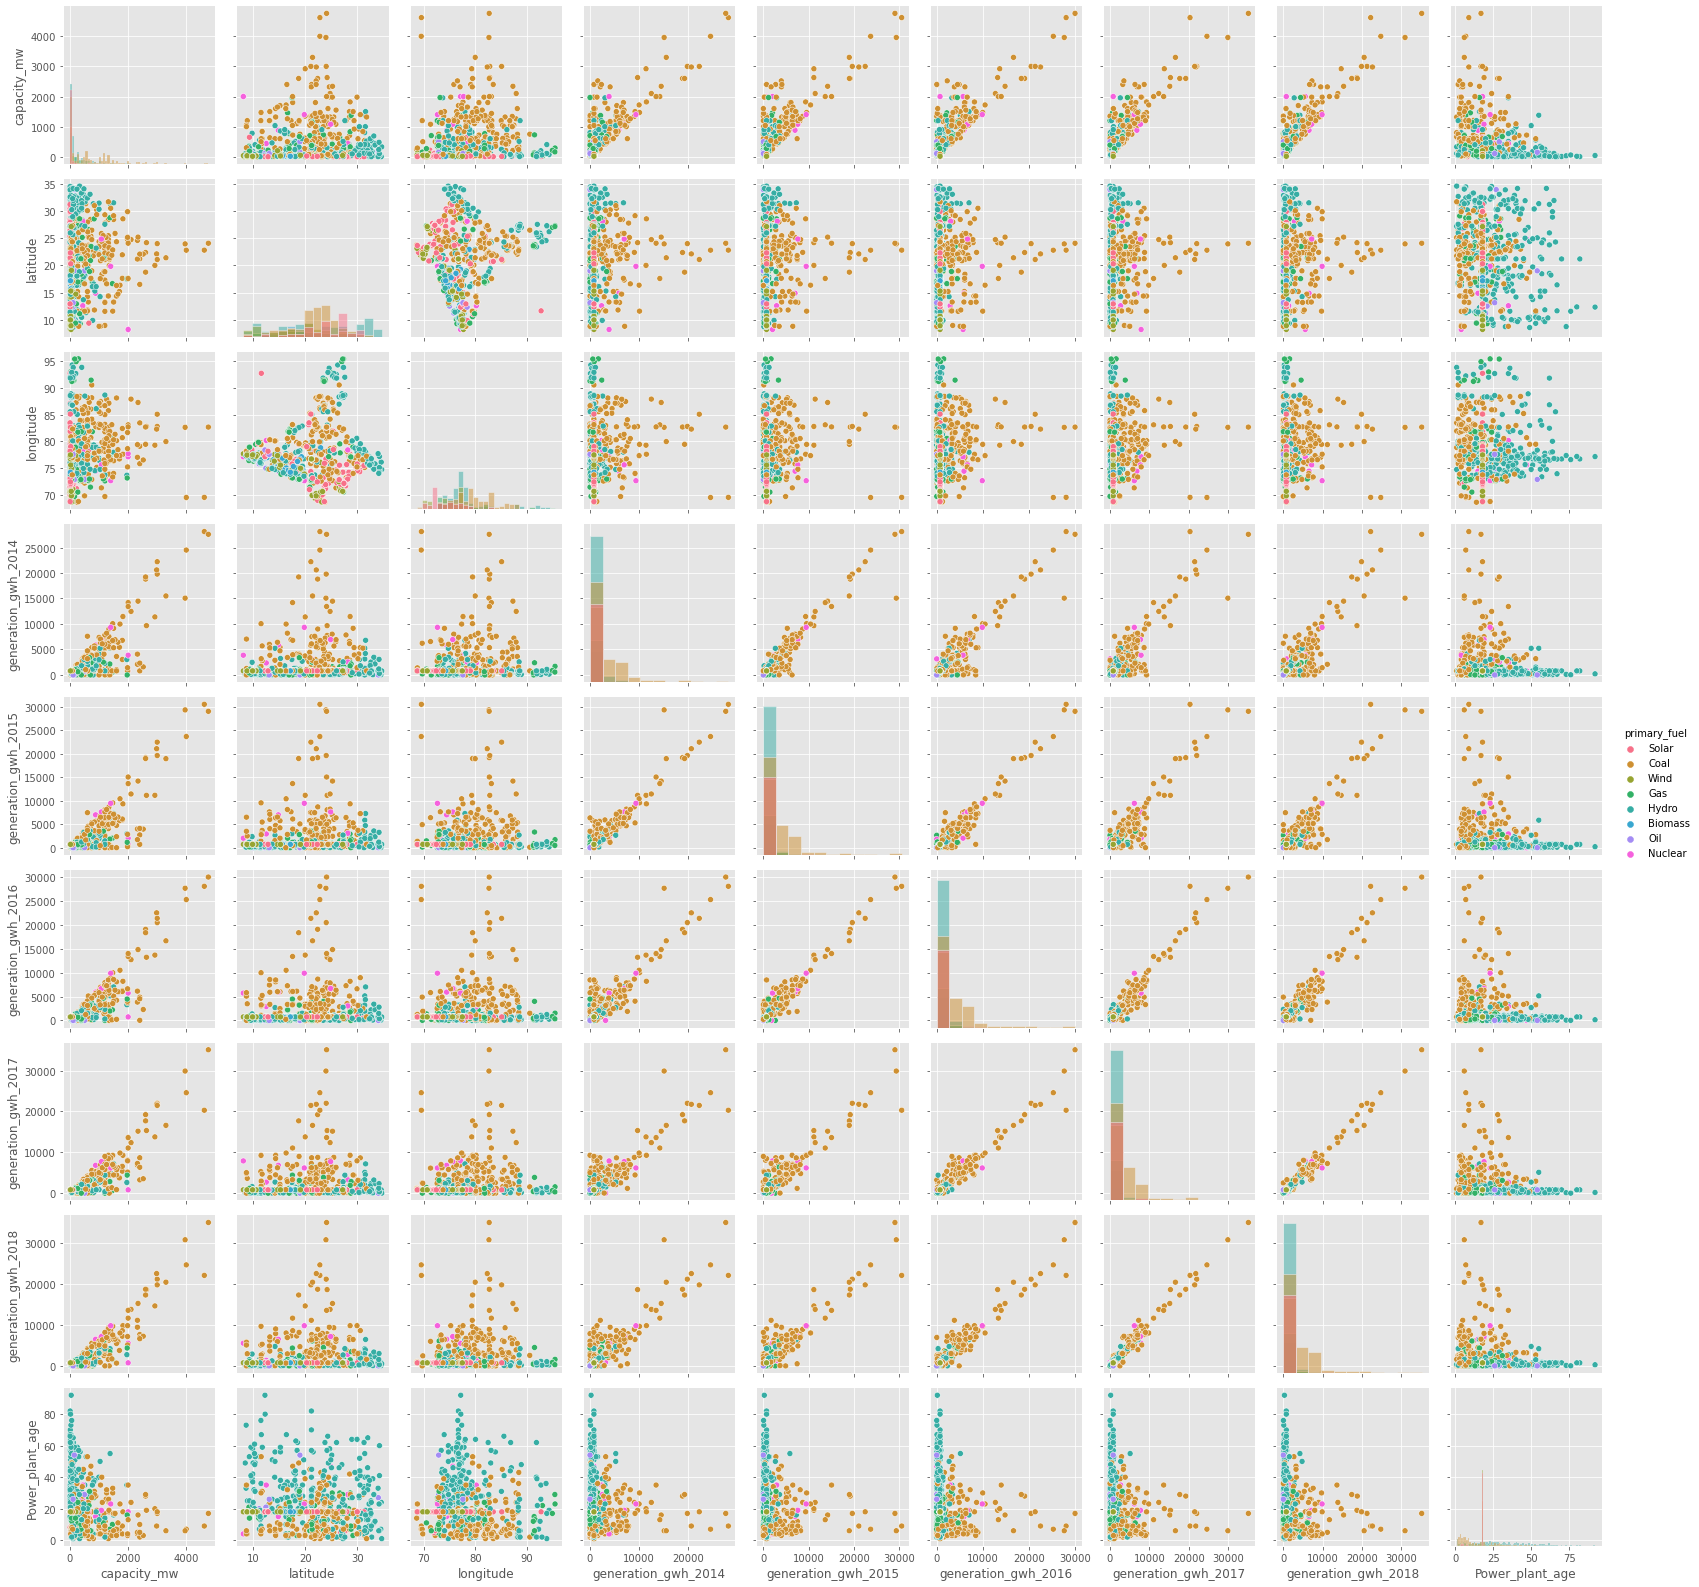

In [45]:
# Checking the pairwise relation between the features and label capacity in megawatt.
g = sns.PairGrid(df, hue="primary_fuel")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

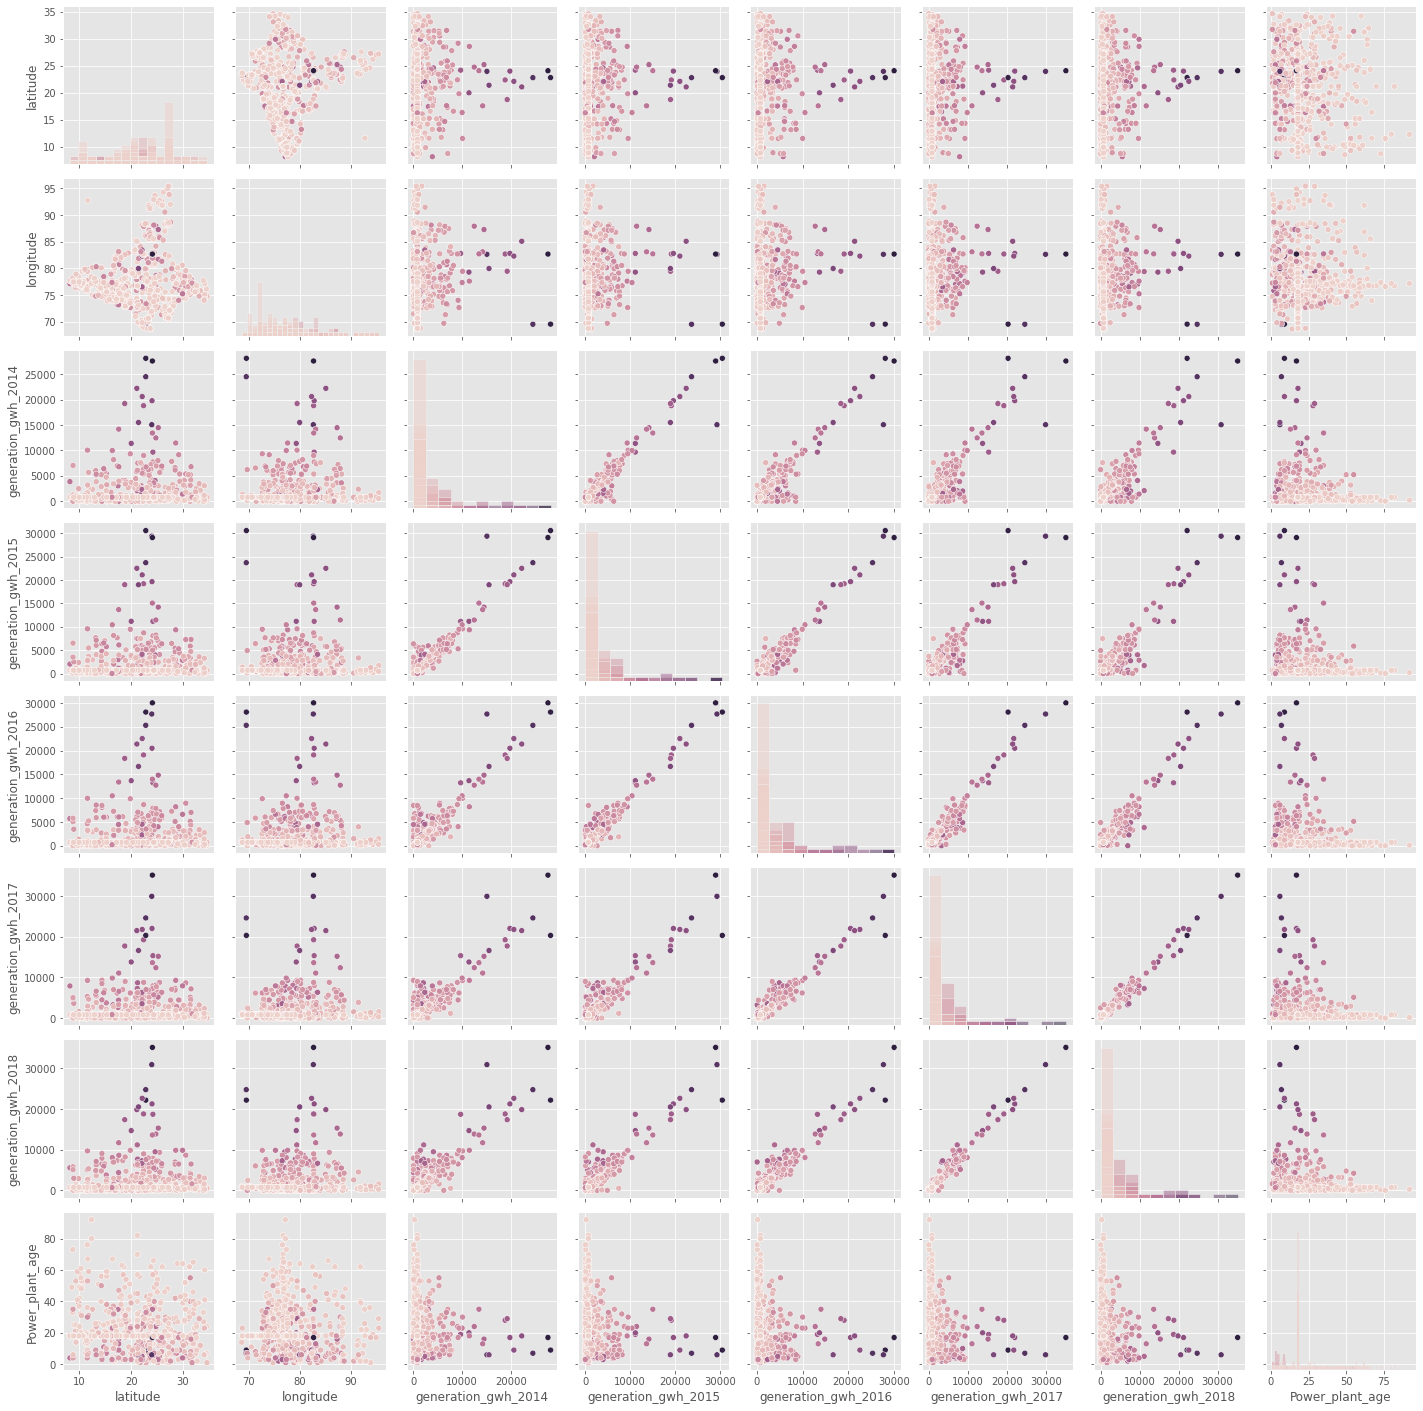

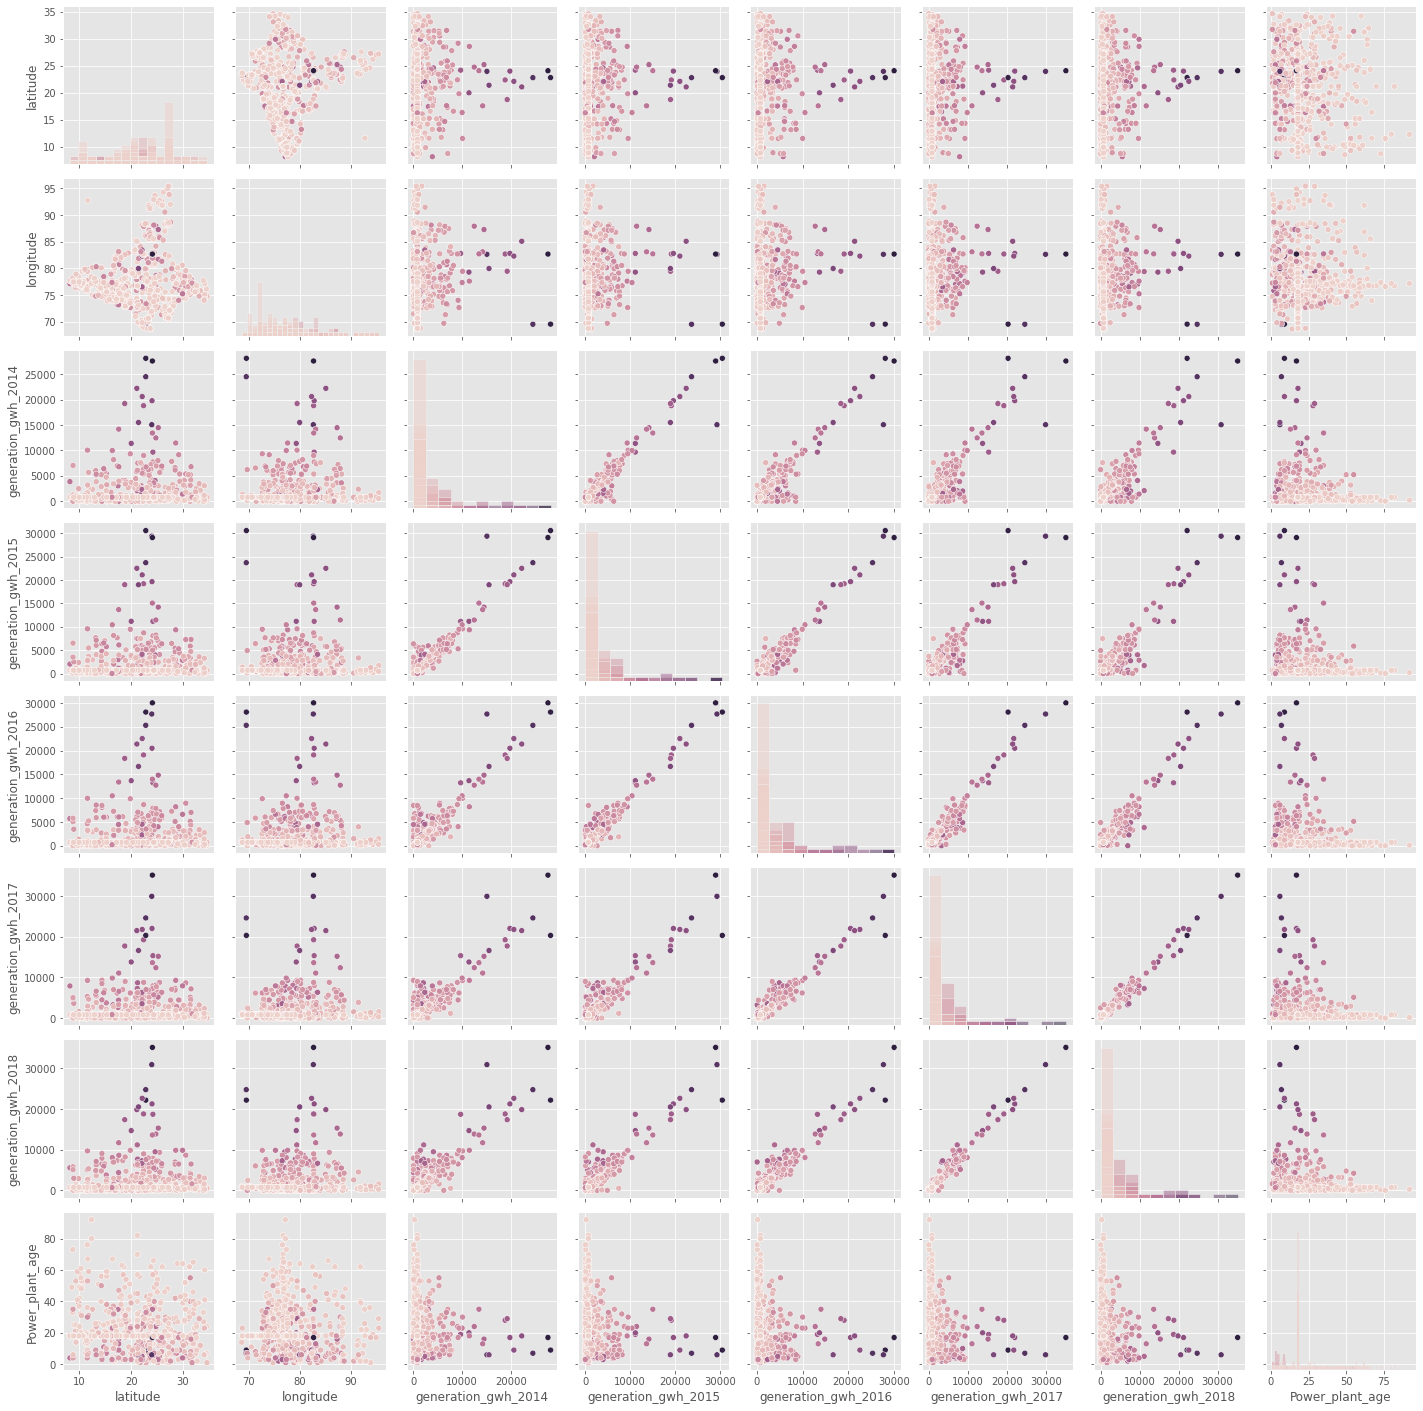

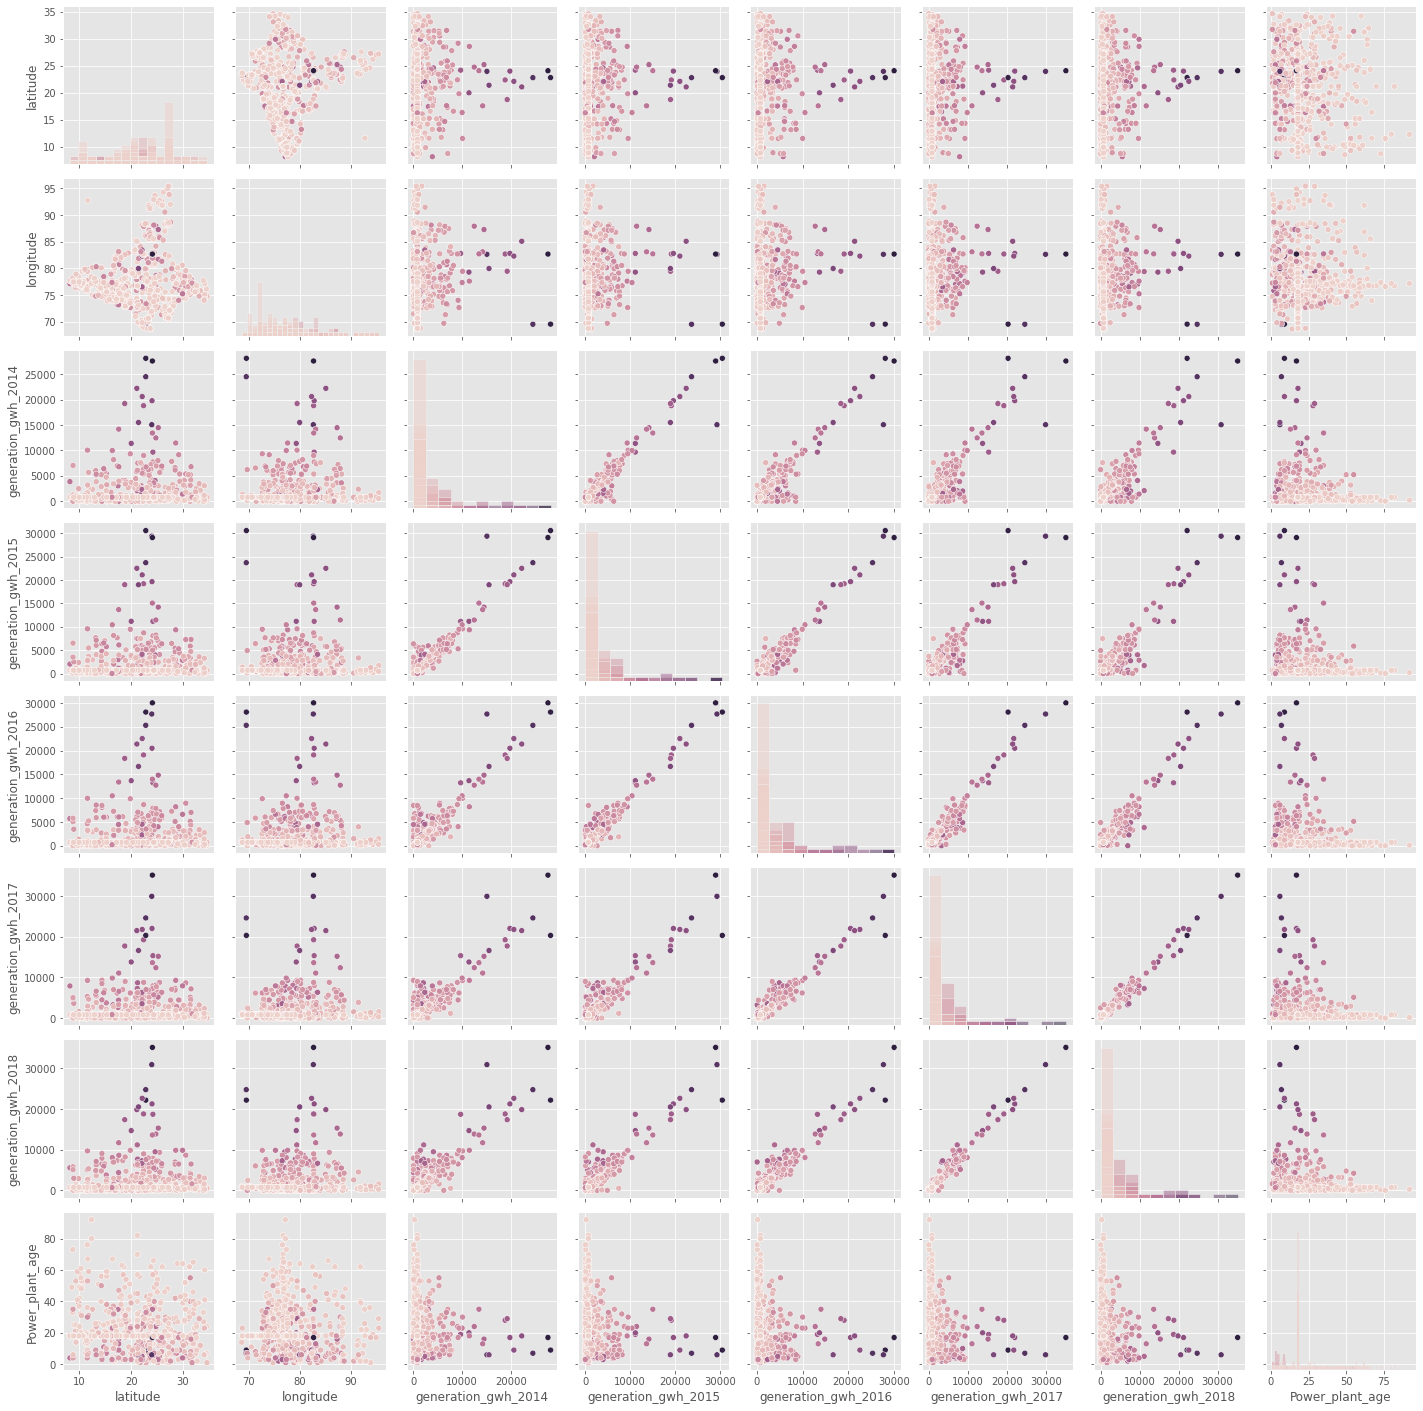

In [46]:
g = sns.PairGrid(df,hue="capacity_mw")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

# identifying the outliers

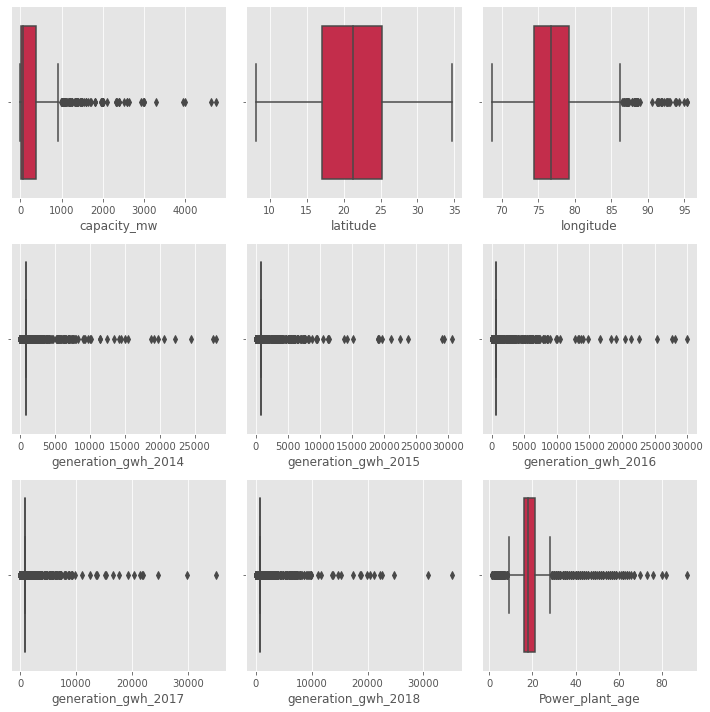

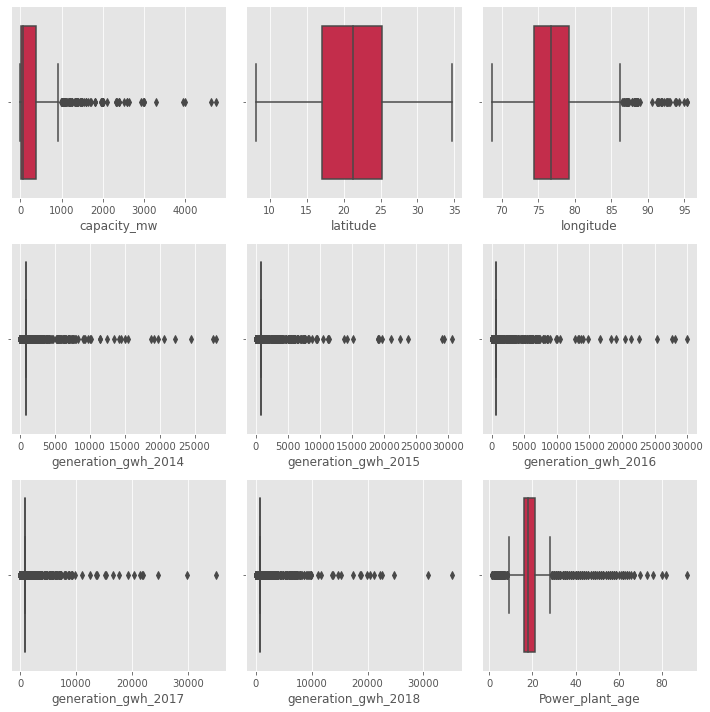

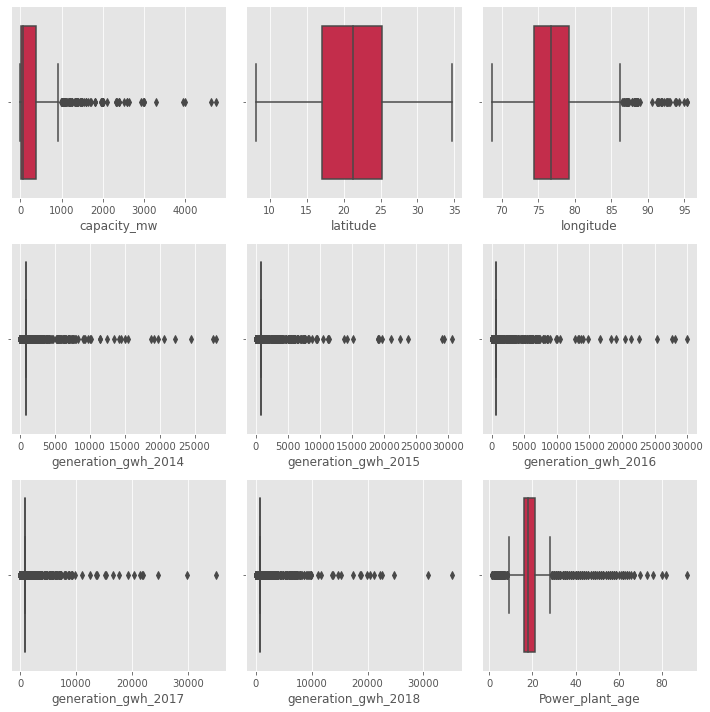

In [47]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="crimson")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Since capacity_mw is my target no need to remove outliers in that column.

# Removing outliers

# i) Zscore method

In [48]:
# Features containing outliers
features = df[['longitude',  'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018','Power_plant_age']]

In [49]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

longitude  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0     0.869917             0.257022             0.267783             0.275737   
1     0.585590             0.257022             0.267783             0.275737   
2     1.673567             0.257022             0.267783             0.275737   
3     2.895239             0.322873             0.223348             0.226194   
4     1.035238             0.545554             1.476964             1.557432   
..         ...                  ...                  ...                  ...   
902   0.014609             0.257022             0.505833             0.443415   
903   0.153415             0.257022             0.267783             0.275737   
904   0.383592             0.257022             0.267783             0.275737   
905   0.764564             0.257022             0.267783             0.275737   
906   0.010327             0.257022             0.267783             0.275737   

     generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0               0.275565             0.288394         0.933076  
1               0.275565             0.288394         0.172699  
2               0.275565             0.288394         0.172699  
3               0.326203             0.327990         0.400812  
4               1.224379             1.772608         1.237227  
..                   ...                  ...              ...  
902             0.259992             0.308963         1.313265  
903             0.275565             0.288394         0.172699  
904             0.275565             0.288394         0.172699  
905             0.275565             0.288394         0.172699  
906             0.275565             0.288394         0.172699  

[907 rows x 7 columns]

longitude  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0     0.869917             0.257022             0.267783             0.275737   
1     0.585590             0.257022             0.267783             0.275737   
2     1.673567             0.257022             0.267783             0.275737   
3     2.895239             0.322873             0.223348             0.226194   
4     1.035238             0.545554             1.476964             1.557432   
..         ...                  ...                  ...                  ...   
902   0.014609             0.257022             0.505833             0.443415   
903   0.153415             0.257022             0.267783             0.275737   
904   0.383592             0.257022             0.267783             0.275737   
905   0.764564             0.257022             0.267783             0.275737   
906   0.010327             0.257022             0.267783             0.275737   

     generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0               0.275565             0.288394         0.933076  
1               0.275565             0.288394         0.172699  
2               0.275565             0.288394         0.172699  
3               0.326203             0.327990         0.400812  
4               1.224379             1.772608         1.237227  
..                   ...                  ...              ...  
902             0.259992             0.308963         1.313265  
903             0.275565             0.288394         0.172699  
904             0.275565             0.288394         0.172699  
905             0.275565             0.288394         0.172699  
906             0.275565             0.288394         0.172699  

[907 rows x 7 columns]

longitude  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0     0.869917             0.257022             0.267783             0.275737   
1     0.585590             0.257022             0.267783             0.275737   
2     1.673567             0.257022             0.267783             0.275737   
3     2.895239             0.322873             0.223348             0.226194   
4     1.035238             0.545554             1.476964             1.557432   
..         ...                  ...                  ...                  ...   
902   0.014609             0.257022             0.505833             0.443415   
903   0.153415             0.257022             0.267783             0.275737   
904   0.383592             0.257022             0.267783             0.275737   
905   0.764564             0.257022             0.267783             0.275737   
906   0.010327             0.257022             0.267783             0.275737   

     generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0               0.275565             0.288394         0.933076  
1               0.275565             0.288394         0.172699  
2               0.275565             0.288394         0.172699  
3               0.326203             0.327990         0.400812  
4               1.224379             1.772608         1.237227  
..                   ...                  ...              ...  
902             0.259992             0.308963         1.313265  
903             0.275565             0.288394         0.172699  
904             0.275565             0.288394         0.172699  
905             0.275565             0.288394         0.172699  
906             0.275565             0.288394         0.172699  

[907 rows x 7 columns]

In [50]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         Oil   
1           98.0   24.7663    74.6090         Coal         Oil   
2           39.2   21.9038    69.3732         Wind         Oil   
3          135.0   23.8712    91.3602          Gas         Oil   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         Oil   
904         25.5   15.2758    75.5811         Wind         Oil   
905         80.0   24.3500    73.7477         Coal         Oil   
906         16.5    9.9344    77.4768         Wind         Oil   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory           801.123775   
1                                     WRI           801.123775   
2                                     WRI           801.123775   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI           801.123775   
903                        Industry About           801.123775   
904                                   WRI           801.123775   
905                                   WRI           801.123775   
906                                   WRI           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  Power_plant_age  
0             751.644375              8.0  
1             751.644375             18.0  
2             751.644375             18.0  
3             626.239128             15.0  
4            7279.000000              4.0  
..                   ...              ...  
902           686.500000              3.0  
903           751.644375             18.0  
904           751.644375             18.0  
905           751.644375             18.0  
906           751.644375             18.0  

[851 rows x 13 columns]

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         Oil   
1           98.0   24.7663    74.6090         Coal         Oil   
2           39.2   21.9038    69.3732         Wind         Oil   
3          135.0   23.8712    91.3602          Gas         Oil   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         Oil   
904         25.5   15.2758    75.5811         Wind         Oil   
905         80.0   24.3500    73.7477         Coal         Oil   
906         16.5    9.9344    77.4768         Wind         Oil   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory           801.123775   
1                                     WRI           801.123775   
2                                     WRI           801.123775   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI           801.123775   
903                        Industry About           801.123775   
904                                   WRI           801.123775   
905                                   WRI           801.123775   
906                                   WRI           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  Power_plant_age  
0             751.644375              8.0  
1             751.644375             18.0  
2             751.644375             18.0  
3             626.239128             15.0  
4            7279.000000              4.0  
..                   ...              ...  
902           686.500000              3.0  
903           751.644375             18.0  
904           751.644375             18.0  
905           751.644375             18.0  
906           751.644375             18.0  

[851 rows x 13 columns]

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         Oil   
1           98.0   24.7663    74.6090         Coal         Oil   
2           39.2   21.9038    69.3732         Wind         Oil   
3          135.0   23.8712    91.3602          Gas         Oil   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         Oil   
904         25.5   15.2758    75.5811         Wind         Oil   
905         80.0   24.3500    73.7477         Coal         Oil   
906         16.5    9.9344    77.4768         Wind         Oil   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory           801.123775   
1                                     WRI           801.123775   
2                                     WRI           801.123775   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI           801.123775   
903                        Industry About           801.123775   
904                                   WRI           801.123775   
905                                   WRI           801.123775   
906                                   WRI           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  Power_plant_age  
0             751.644375              8.0  
1             751.644375             18.0  
2             751.644375             18.0  
3             626.239128             15.0  
4            7279.000000              4.0  
..                   ...              ...  
902           686.500000              3.0  
903           751.644375             18.0  
904           751.644375             18.0  
905           751.644375             18.0  
906           751.644375             18.0  

[851 rows x 13 columns]

This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [51]:
# Shape of original dataset
df.shape

(907, 13)

(907, 13)

(907, 13)


Before removing the outliers we had 907 rows and 13 columns.

In [52]:
new_df.shape

(851, 13)

(851, 13)

(851, 13)

from the above After removing the outliers we have 851 rows and 13 columns.

In [53]:
# Checking the the data loss
data_loss = (907-851)/907*100
data_loss

6.174200661521499

6.174200661521499

6.174200661521499

Using Zscore i have 6.17% data loss.Which is less than 10%.But still let me have a look into IQR method also.

# ii) IQR (Inter Quantile Range) method

In [54]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [55]:
df1.shape

(420, 13)

(420, 13)

(420, 13)

from the above Using IQR method the dataframe has 420 rows and 13 columns.

In [56]:
# Let's check the dataloss
data_loss = (907-420)/907*100
data_loss

53.69349503858876

53.69349503858876

53.69349503858876

Using IQR method we are losing 54% of data, so considering Zscore method for better result.

# Encoding the categorical columns using Label Encoding

In [57]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [58]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [59]:
new_df[categorical_col]

primary_fuel  other_fuel1  source  geolocation_source
0               6            2     109                   1
1               1            2     174                   2
2               7            2      21                   2
3               2            2      22                   2
4               1            2      22                   2
..            ...          ...     ...                 ...
902             1            2      22                   2
903             6            2      77                   0
904             7            2      21                   2
905             1            2      59                   2
906             7            2      21                   2

[851 rows x 4 columns]

primary_fuel  other_fuel1  source  geolocation_source
0               6            2     109                   1
1               1            2     174                   2
2               7            2      21                   2
3               2            2      22                   2
4               1            2      22                   2
..            ...          ...     ...                 ...
902             1            2      22                   2
903             6            2      77                   0
904             7            2      21                   2
905             1            2      59                   2
906             7            2      21                   2

[851 rows x 4 columns]

primary_fuel  other_fuel1  source  geolocation_source
0               6            2     109                   1
1               1            2     174                   2
2               7            2      21                   2
3               2            2      22                   2
4               1            2      22                   2
..            ...          ...     ...                 ...
902             1            2      22                   2
903             6            2      77                   0
904             7            2      21                   2
905             1            2      59                   2
906             7            2      21                   2

[851 rows x 4 columns]

# Correlation between the target variable and features using HEAT map

In [60]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.050588   0.257582     -0.398039   
latitude                0.050588  1.000000  -0.014145     -0.002561   
longitude               0.257582 -0.014145   1.000000     -0.382975   
primary_fuel           -0.398039 -0.002561  -0.382975      1.000000   
other_fuel1            -0.001758  0.037049   0.029191      0.006463   
source                 -0.275724  0.069430  -0.235719      0.038558   
geolocation_source      0.234543 -0.203340   0.263739     -0.478601   
generation_gwh_2014     0.620202  0.081661   0.119473     -0.250101   
generation_gwh_2015     0.680949  0.071346   0.154522     -0.276308   
generation_gwh_2016     0.750088  0.057301   0.195299     -0.286624   
generation_gwh_2017     0.788972  0.071296   0.196529     -0.289232   
generation_gwh_2018     0.815198  0.064558   0.204421     -0.298364   
Power_plant_age        -0.241487 -0.097033  -0.080034      0.074358   

                     other_fuel1    source  geolocation_source  \
capacity_mw            -0.001758 -0.275724            0.234543   
latitude                0.037049  0.069430           -0.203340   
longitude               0.029191 -0.235719            0.263739   
primary_fuel            0.006463  0.038558           -0.478601   
other_fuel1             1.000000  0.028471           -0.022827   
source                  0.028471  1.000000           -0.497893   
geolocation_source     -0.022827 -0.497893            1.000000   
generation_gwh_2014    -0.000530 -0.141496            0.113446   
generation_gwh_2015     0.006092 -0.156317            0.125329   
generation_gwh_2016     0.015479 -0.158561            0.127128   
generation_gwh_2017     0.011842 -0.156155            0.125199   
generation_gwh_2018     0.022700 -0.165232            0.132477   
Power_plant_age        -0.058103 -0.075353            0.051608   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.620202             0.680949   
latitude                        0.081661             0.071346   
longitude                       0.119473             0.154522   
primary_fuel                   -0.250101            -0.276308   
other_fuel1                    -0.000530             0.006092   
source                         -0.141496            -0.156317   
geolocation_source              0.113446             0.125329   
generation_gwh_2014             1.000000             0.912185   
generation_gwh_2015             0.912185             1.000000   
generation_gwh_2016             0.801237             0.907984   
generation_gwh_2017             0.746130             0.830394   
generation_gwh_2018             0.738063             0.821726   
Power_plant_age                -0.059768            -0.130252   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.750088             0.788972   
latitude                        0.057301             0.071296   
longitude                       0.195299             0.196529   
primary_fuel                   -0.286624            -0.289232   
other_fuel1                     0.015479             0.011842   
source                         -0.158561            -0.156155   
geolocation_source              0.127128             0.125199   
generation_gwh_2014             0.801237             0.746130   
generation_gwh_2015             0.907984             0.830394   
generation_gwh_2016             1.000000             0.932729   
generation_gwh_2017             0.932729             1.000000   
generation_gwh_2018             0.913720             0.964318   
Power_plant_age                -0.199087            -0.221382   

                     generation_gwh_2018  Power_plant_age  
capacity_mw                     0.815198        -0.241487  
latitude                        0.064558        -0.097033  
longitude                       0.204421        -0.080034  
primary_fuel                   -0.29836

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.050588   0.257582     -0.398039   
latitude                0.050588  1.000000  -0.014145     -0.002561   
longitude               0.257582 -0.014145   1.000000     -0.382975   
primary_fuel           -0.398039 -0.002561  -0.382975      1.000000   
other_fuel1            -0.001758  0.037049   0.029191      0.006463   
source                 -0.275724  0.069430  -0.235719      0.038558   
geolocation_source      0.234543 -0.203340   0.263739     -0.478601   
generation_gwh_2014     0.620202  0.081661   0.119473     -0.250101   
generation_gwh_2015     0.680949  0.071346   0.154522     -0.276308   
generation_gwh_2016     0.750088  0.057301   0.195299     -0.286624   
generation_gwh_2017     0.788972  0.071296   0.196529     -0.289232   
generation_gwh_2018     0.815198  0.064558   0.204421     -0.298364   
Power_plant_age        -0.241487 -0.097033  -0.080034      0.074358   

                     other_fuel1    source  geolocation_source  \
capacity_mw            -0.001758 -0.275724            0.234543   
latitude                0.037049  0.069430           -0.203340   
longitude               0.029191 -0.235719            0.263739   
primary_fuel            0.006463  0.038558           -0.478601   
other_fuel1             1.000000  0.028471           -0.022827   
source                  0.028471  1.000000           -0.497893   
geolocation_source     -0.022827 -0.497893            1.000000   
generation_gwh_2014    -0.000530 -0.141496            0.113446   
generation_gwh_2015     0.006092 -0.156317            0.125329   
generation_gwh_2016     0.015479 -0.158561            0.127128   
generation_gwh_2017     0.011842 -0.156155            0.125199   
generation_gwh_2018     0.022700 -0.165232            0.132477   
Power_plant_age        -0.058103 -0.075353            0.051608   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.620202             0.680949   
latitude                        0.081661             0.071346   
longitude                       0.119473             0.154522   
primary_fuel                   -0.250101            -0.276308   
other_fuel1                    -0.000530             0.006092   
source                         -0.141496            -0.156317   
geolocation_source              0.113446             0.125329   
generation_gwh_2014             1.000000             0.912185   
generation_gwh_2015             0.912185             1.000000   
generation_gwh_2016             0.801237             0.907984   
generation_gwh_2017             0.746130             0.830394   
generation_gwh_2018             0.738063             0.821726   
Power_plant_age                -0.059768            -0.130252   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.750088             0.788972   
latitude                        0.057301             0.071296   
longitude                       0.195299             0.196529   
primary_fuel                   -0.286624            -0.289232   
other_fuel1                     0.015479             0.011842   
source                         -0.158561            -0.156155   
geolocation_source              0.127128             0.125199   
generation_gwh_2014             0.801237             0.746130   
generation_gwh_2015             0.907984             0.830394   
generation_gwh_2016             1.000000             0.932729   
generation_gwh_2017             0.932729             1.000000   
generation_gwh_2018             0.913720             0.964318   
Power_plant_age                -0.199087            -0.221382   

                     generation_gwh_2018  Power_plant_age  
capacity_mw                     0.815198        -0.241487  
latitude                        0.064558        -0.097033  
longitude                       0.204421        -0.080034  
primary_fuel                   -0.29836

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.050588   0.257582     -0.398039   
latitude                0.050588  1.000000  -0.014145     -0.002561   
longitude               0.257582 -0.014145   1.000000     -0.382975   
primary_fuel           -0.398039 -0.002561  -0.382975      1.000000   
other_fuel1            -0.001758  0.037049   0.029191      0.006463   
source                 -0.275724  0.069430  -0.235719      0.038558   
geolocation_source      0.234543 -0.203340   0.263739     -0.478601   
generation_gwh_2014     0.620202  0.081661   0.119473     -0.250101   
generation_gwh_2015     0.680949  0.071346   0.154522     -0.276308   
generation_gwh_2016     0.750088  0.057301   0.195299     -0.286624   
generation_gwh_2017     0.788972  0.071296   0.196529     -0.289232   
generation_gwh_2018     0.815198  0.064558   0.204421     -0.298364   
Power_plant_age        -0.241487 -0.097033  -0.080034      0.074358   

                     other_fuel1    source  geolocation_source  \
capacity_mw            -0.001758 -0.275724            0.234543   
latitude                0.037049  0.069430           -0.203340   
longitude               0.029191 -0.235719            0.263739   
primary_fuel            0.006463  0.038558           -0.478601   
other_fuel1             1.000000  0.028471           -0.022827   
source                  0.028471  1.000000           -0.497893   
geolocation_source     -0.022827 -0.497893            1.000000   
generation_gwh_2014    -0.000530 -0.141496            0.113446   
generation_gwh_2015     0.006092 -0.156317            0.125329   
generation_gwh_2016     0.015479 -0.158561            0.127128   
generation_gwh_2017     0.011842 -0.156155            0.125199   
generation_gwh_2018     0.022700 -0.165232            0.132477   
Power_plant_age        -0.058103 -0.075353            0.051608   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.620202             0.680949   
latitude                        0.081661             0.071346   
longitude                       0.119473             0.154522   
primary_fuel                   -0.250101            -0.276308   
other_fuel1                    -0.000530             0.006092   
source                         -0.141496            -0.156317   
geolocation_source              0.113446             0.125329   
generation_gwh_2014             1.000000             0.912185   
generation_gwh_2015             0.912185             1.000000   
generation_gwh_2016             0.801237             0.907984   
generation_gwh_2017             0.746130             0.830394   
generation_gwh_2018             0.738063             0.821726   
Power_plant_age                -0.059768            -0.130252   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.750088             0.788972   
latitude                        0.057301             0.071296   
longitude                       0.195299             0.196529   
primary_fuel                   -0.286624            -0.289232   
other_fuel1                     0.015479             0.011842   
source                         -0.158561            -0.156155   
geolocation_source              0.127128             0.125199   
generation_gwh_2014             0.801237             0.746130   
generation_gwh_2015             0.907984             0.830394   
generation_gwh_2016             1.000000             0.932729   
generation_gwh_2017             0.932729             1.000000   
generation_gwh_2018             0.913720             0.964318   
Power_plant_age                -0.199087            -0.221382   

                     generation_gwh_2018  Power_plant_age  
capacity_mw                     0.815198        -0.241487  
latitude                        0.064558        -0.097033  
longitude                       0.204421        -0.080034  
primary_fuel                   -0.29836

This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

# Correlation between primary_fuel and features :

The label Fuel_Type is less correlated with Power_plant_age and source.
The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

# Correlation between capacity_mw and features:

The label capacity_mw is highly positively correlated with the features generation_gwh_2018, features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014.
And the label is negatively correlated with the feature primary_fuel, source and Power_plant_age.
The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

# Visualizing the correlation between label(primary_fuel) and features using bar plot

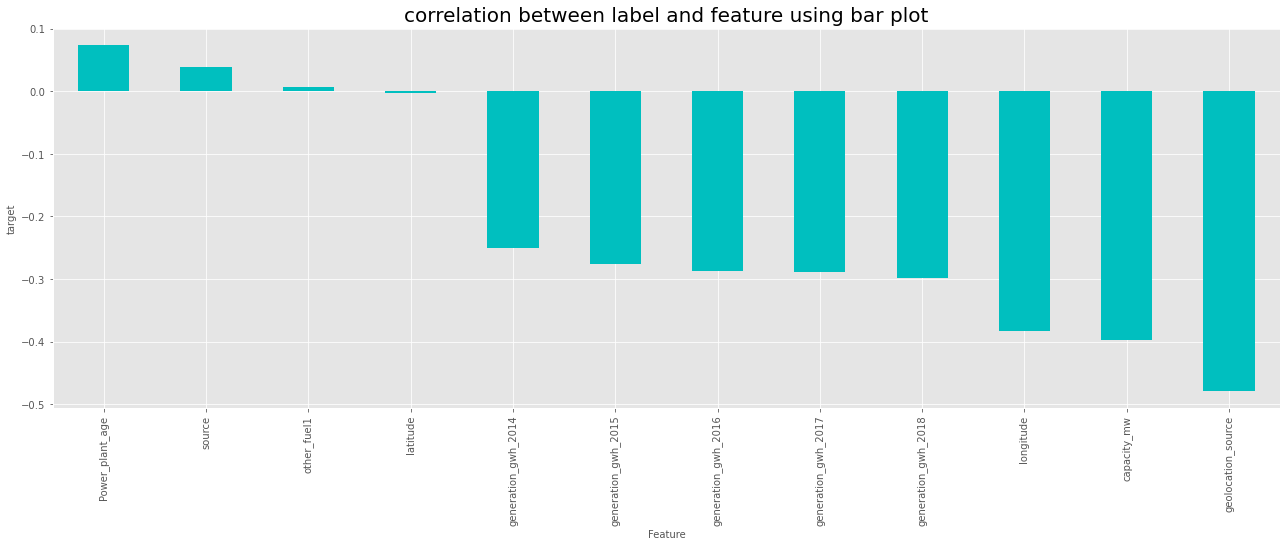

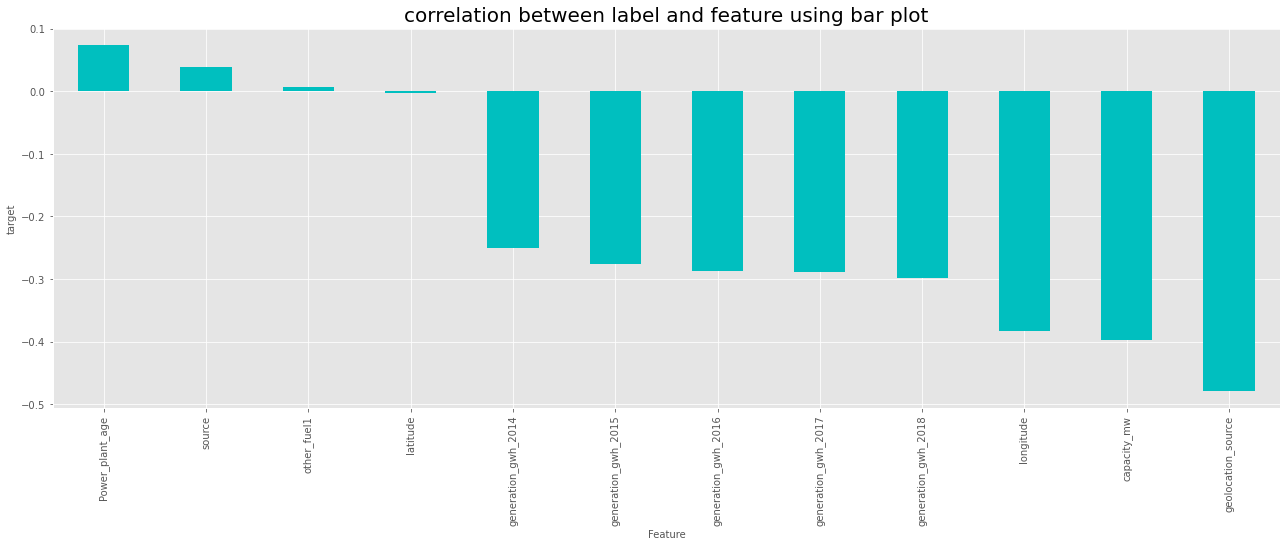

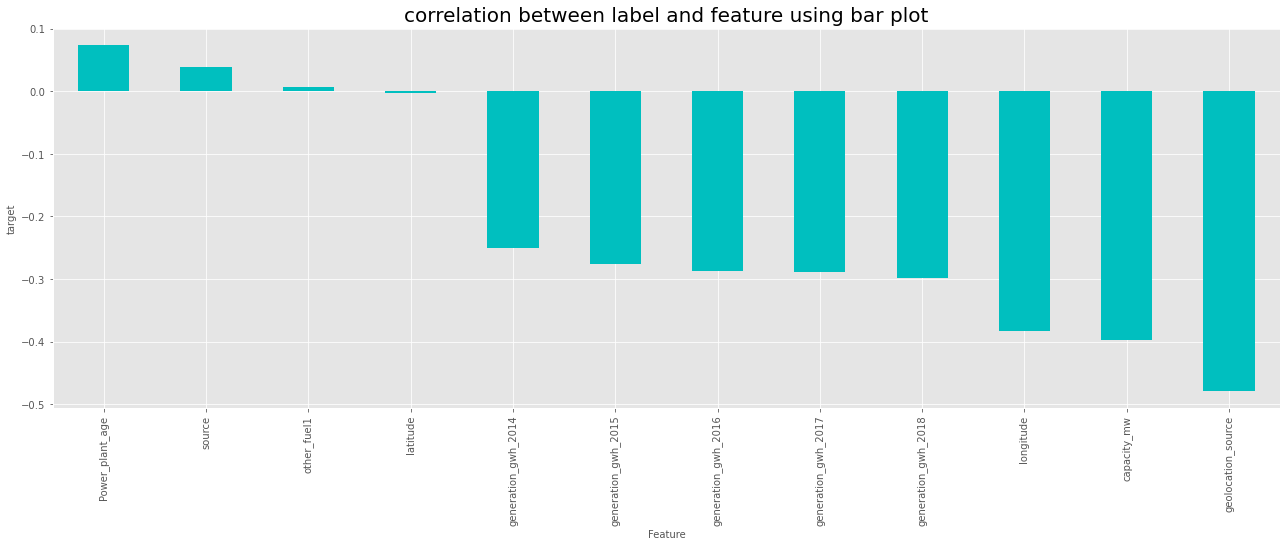

In [61]:
plt.figure(figsize=(22,7))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

from the above other_fuel1 and latitude is very less correlated with primary_fuel so i can drop it.

# Visualizing the correlation between label(capacity_mw) and features using bar plot

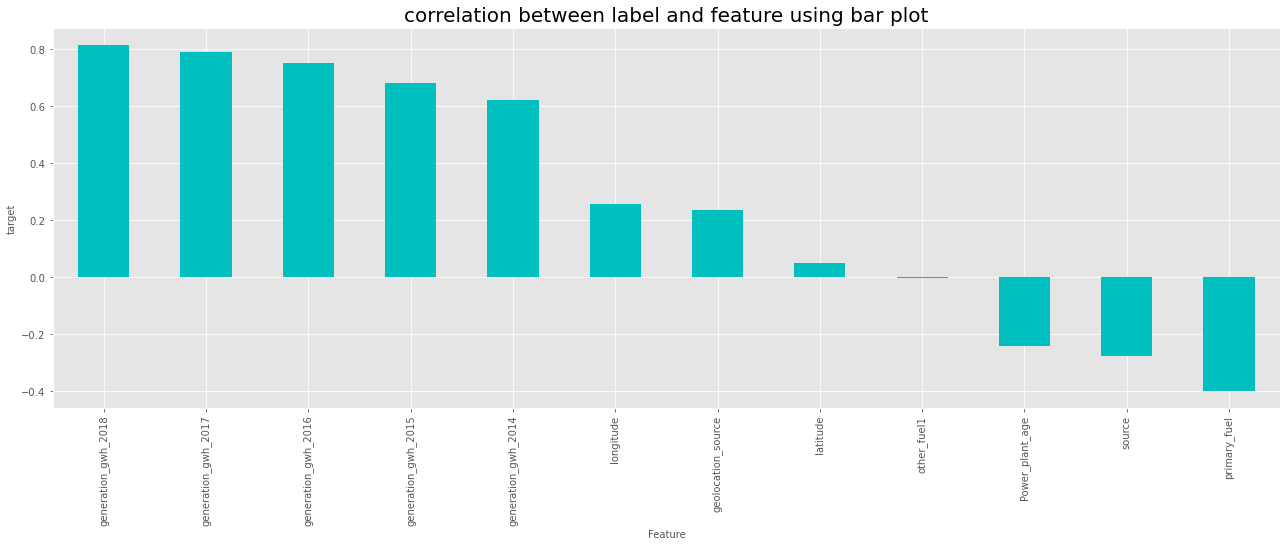

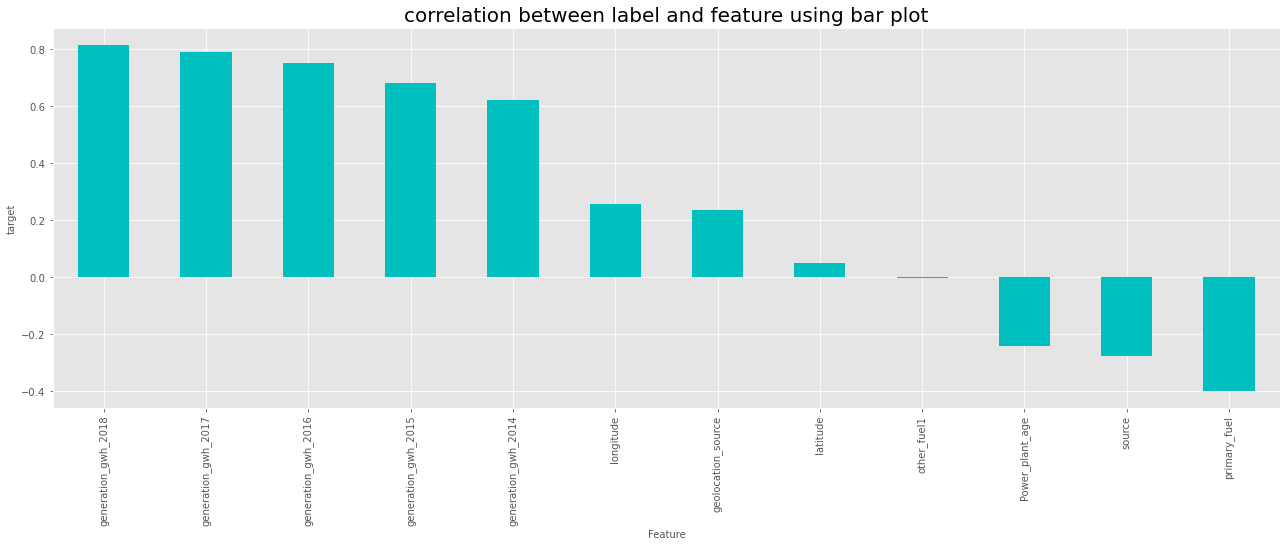

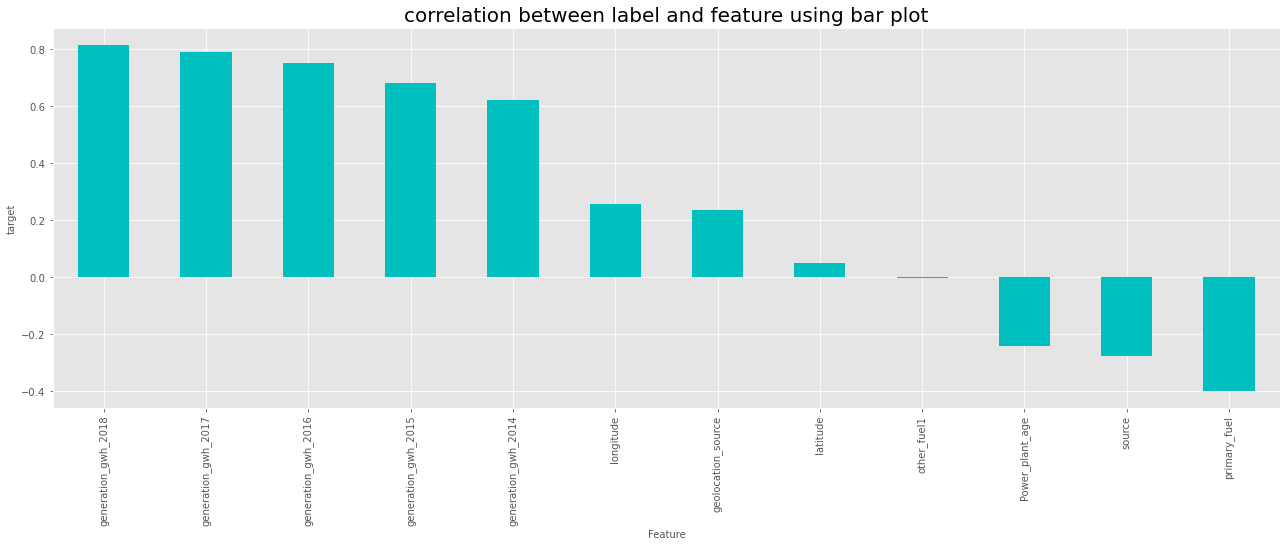

In [62]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

from the above Lattitude and otherfuel_1 have less correlation with target variable, i can drop these columns.

In [63]:
#Droping less correlated column
new_df =new_df.drop(["other_fuel1"],axis=1)
new_df =new_df.drop(["latitude"],axis=1)

In [64]:
new_df.head()

capacity_mw  longitude  primary_fuel  source  geolocation_source  \
0          2.5    73.2407             6     109                   1   
1         98.0    74.6090             1     174                   2   
2         39.2    69.3732             7      21                   2   
3        135.0    91.3602             2      22                   2   
4       1800.0    82.4091             1      22                   2   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           801.123775           711.181225           737.205450   
1           801.123775           711.181225           737.205450   
2           801.123775           711.181225           737.205450   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0           817.977250           751.644375              8.0  
1           817.977250           751.644375             18.0  
2           817.977250           751.644375             18.0  
3           663.774500           626.239128             15.0  
4          5385.579736          7279.000000              4.0

capacity_mw  longitude  primary_fuel  source  geolocation_source  \
0          2.5    73.2407             6     109                   1   
1         98.0    74.6090             1     174                   2   
2         39.2    69.3732             7      21                   2   
3        135.0    91.3602             2      22                   2   
4       1800.0    82.4091             1      22                   2   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           801.123775           711.181225           737.205450   
1           801.123775           711.181225           737.205450   
2           801.123775           711.181225           737.205450   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0           817.977250           751.644375              8.0  
1           817.977250           751.644375             18.0  
2           817.977250           751.644375             18.0  
3           663.774500           626.239128             15.0  
4          5385.579736          7279.000000              4.0

capacity_mw  longitude  primary_fuel  source  geolocation_source  \
0          2.5    73.2407             6     109                   1   
1         98.0    74.6090             1     174                   2   
2         39.2    69.3732             7      21                   2   
3        135.0    91.3602             2      22                   2   
4       1800.0    82.4091             1      22                   2   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           801.123775           711.181225           737.205450   
1           801.123775           711.181225           737.205450   
2           801.123775           711.181225           737.205450   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0           817.977250           751.644375              8.0  
1           817.977250           751.644375             18.0  
2           817.977250           751.644375             18.0  
3           663.774500           626.239128             15.0  
4          5385.579736          7279.000000              4.0

# 1. Prediction for primary_fuel

# Separating the features and label variables into x and y

In [65]:
x = new_df.drop("primary_fuel", axis=1)
y = new_df["primary_fuel"]

In [66]:
x.shape

(851, 10)

(851, 10)

(851, 10)

In [67]:
y.shape

(851,)

(851,)

(851,)

# Checking for skewness

In [68]:
x.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

We can observe the skewness in all the columns but the columns source and geolocation_source are categorical so no need to remove skewness in these columns. Let's remove the skewness in the numerical columns using yeo-johnson method.

# Removing skewness using yeo_johnson method

In [69]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

In [70]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [71]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

capacity_mw  longitude  generation_gwh_2014  generation_gwh_2015  \
0    -1.677389  -0.922012            -0.044061            -0.049141   
1     0.220284  -0.499829            -0.044061            -0.049141   
2    -0.274381  -2.377759            -0.044061            -0.049141   
3     0.391670   2.430594            -0.268922             0.093773   
4     1.731859   1.261979             1.426798             2.286603   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0            -0.046103            -0.035226            -0.057181   
1            -0.046103            -0.035226            -0.057181   
2            -0.046103            -0.035226            -0.057181   
3             0.105691            -0.199692            -0.194159   
4             2.276671             1.983083             2.347272   

   Power_plant_age  
0        -1.091763  
1         0.048165  
2         0.048165  
3        -0.246636  
4        -1.767567

capacity_mw  longitude  generation_gwh_2014  generation_gwh_2015  \
0    -1.677389  -0.922012            -0.044061            -0.049141   
1     0.220284  -0.499829            -0.044061            -0.049141   
2    -0.274381  -2.377759            -0.044061            -0.049141   
3     0.391670   2.430594            -0.268922             0.093773   
4     1.731859   1.261979             1.426798             2.286603   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0            -0.046103            -0.035226            -0.057181   
1            -0.046103            -0.035226            -0.057181   
2            -0.046103            -0.035226            -0.057181   
3             0.105691            -0.199692            -0.194159   
4             2.276671             1.983083             2.347272   

   Power_plant_age  
0        -1.091763  
1         0.048165  
2         0.048165  
3        -0.246636  
4        -1.767567

capacity_mw  longitude  generation_gwh_2014  generation_gwh_2015  \
0    -1.677389  -0.922012            -0.044061            -0.049141   
1     0.220284  -0.499829            -0.044061            -0.049141   
2    -0.274381  -2.377759            -0.044061            -0.049141   
3     0.391670   2.430594            -0.268922             0.093773   
4     1.731859   1.261979             1.426798             2.286603   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0            -0.046103            -0.035226            -0.057181   
1            -0.046103            -0.035226            -0.057181   
2            -0.046103            -0.035226            -0.057181   
3             0.105691            -0.199692            -0.194159   
4             2.276671             1.983083             2.347272   

   Power_plant_age  
0        -1.091763  
1         0.048165  
2         0.048165  
3        -0.246636  
4        -1.767567

In [72]:
# Checking skewness after using yeo-johnson ethod
x.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.037156
dtype: float64

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.037156
dtype: float64

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.037156
dtype: float64

Now we have removed the skewness in all the numerical columns.

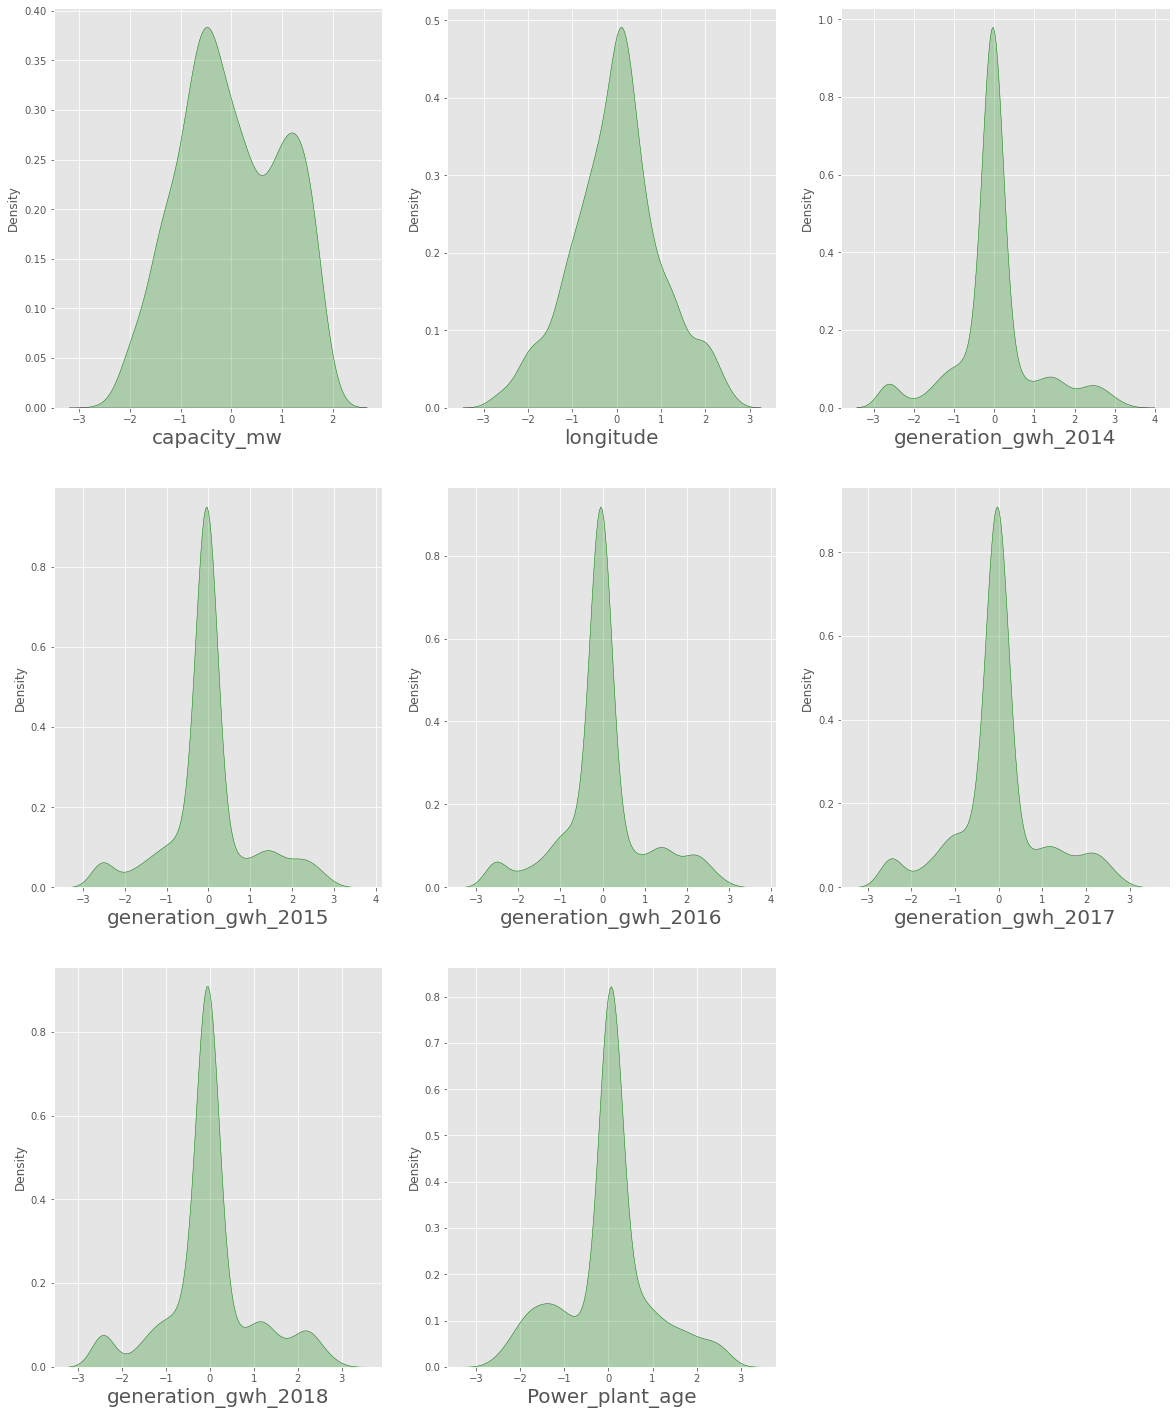

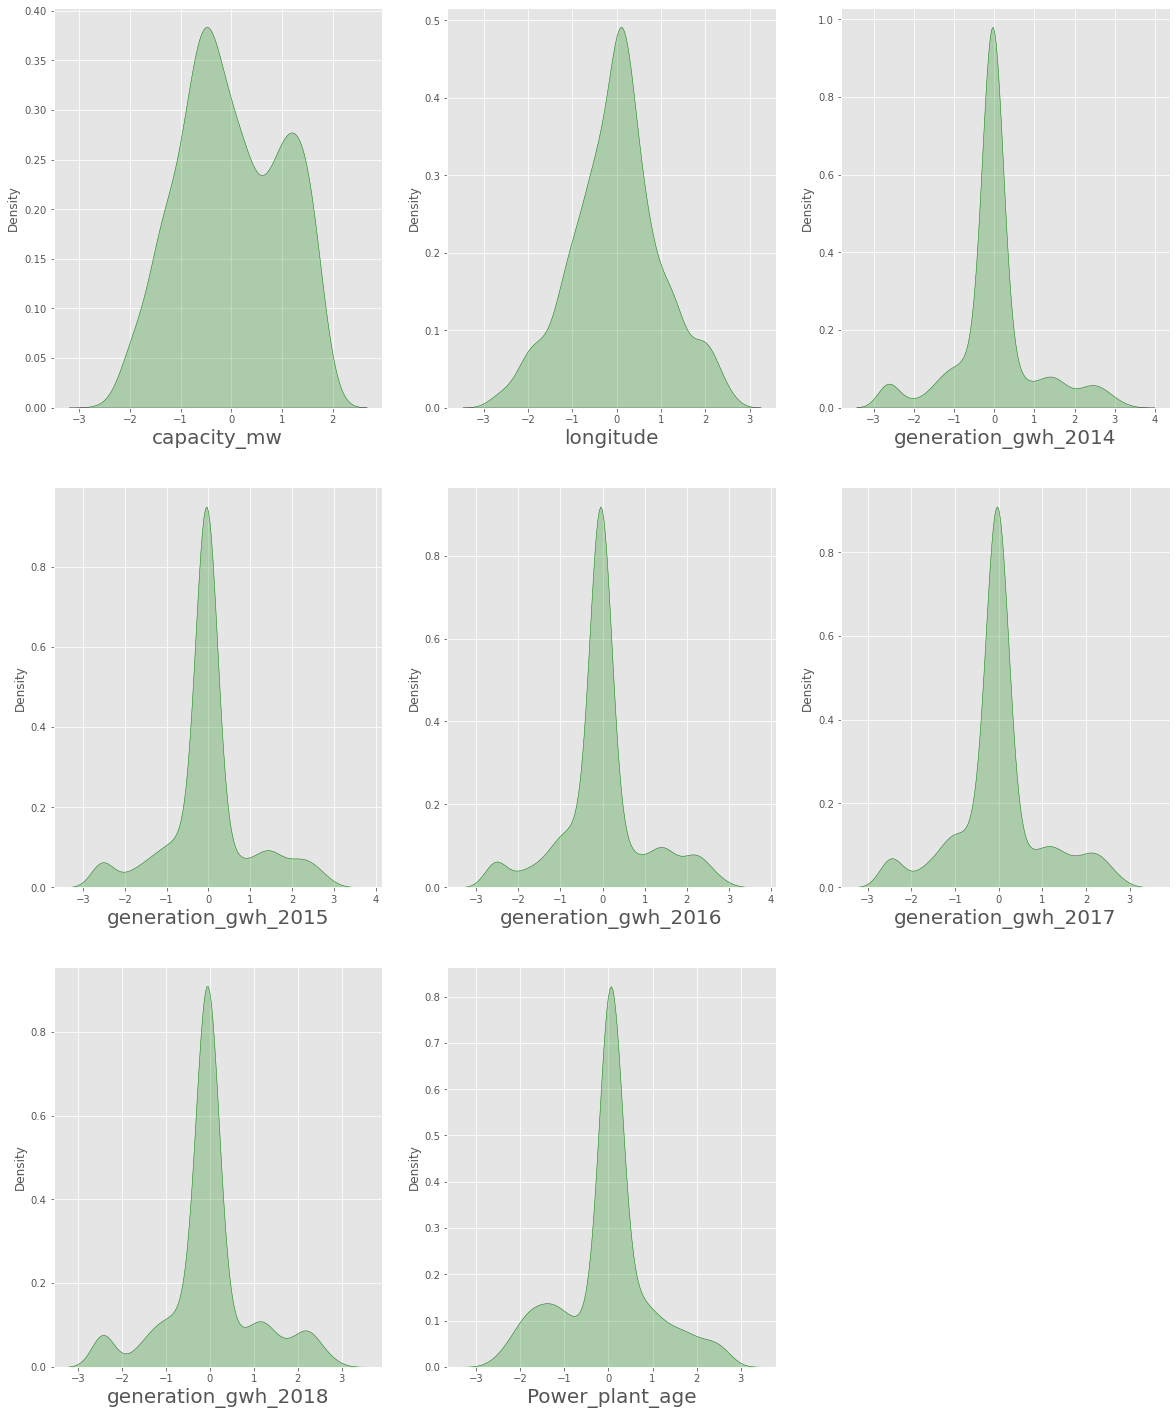

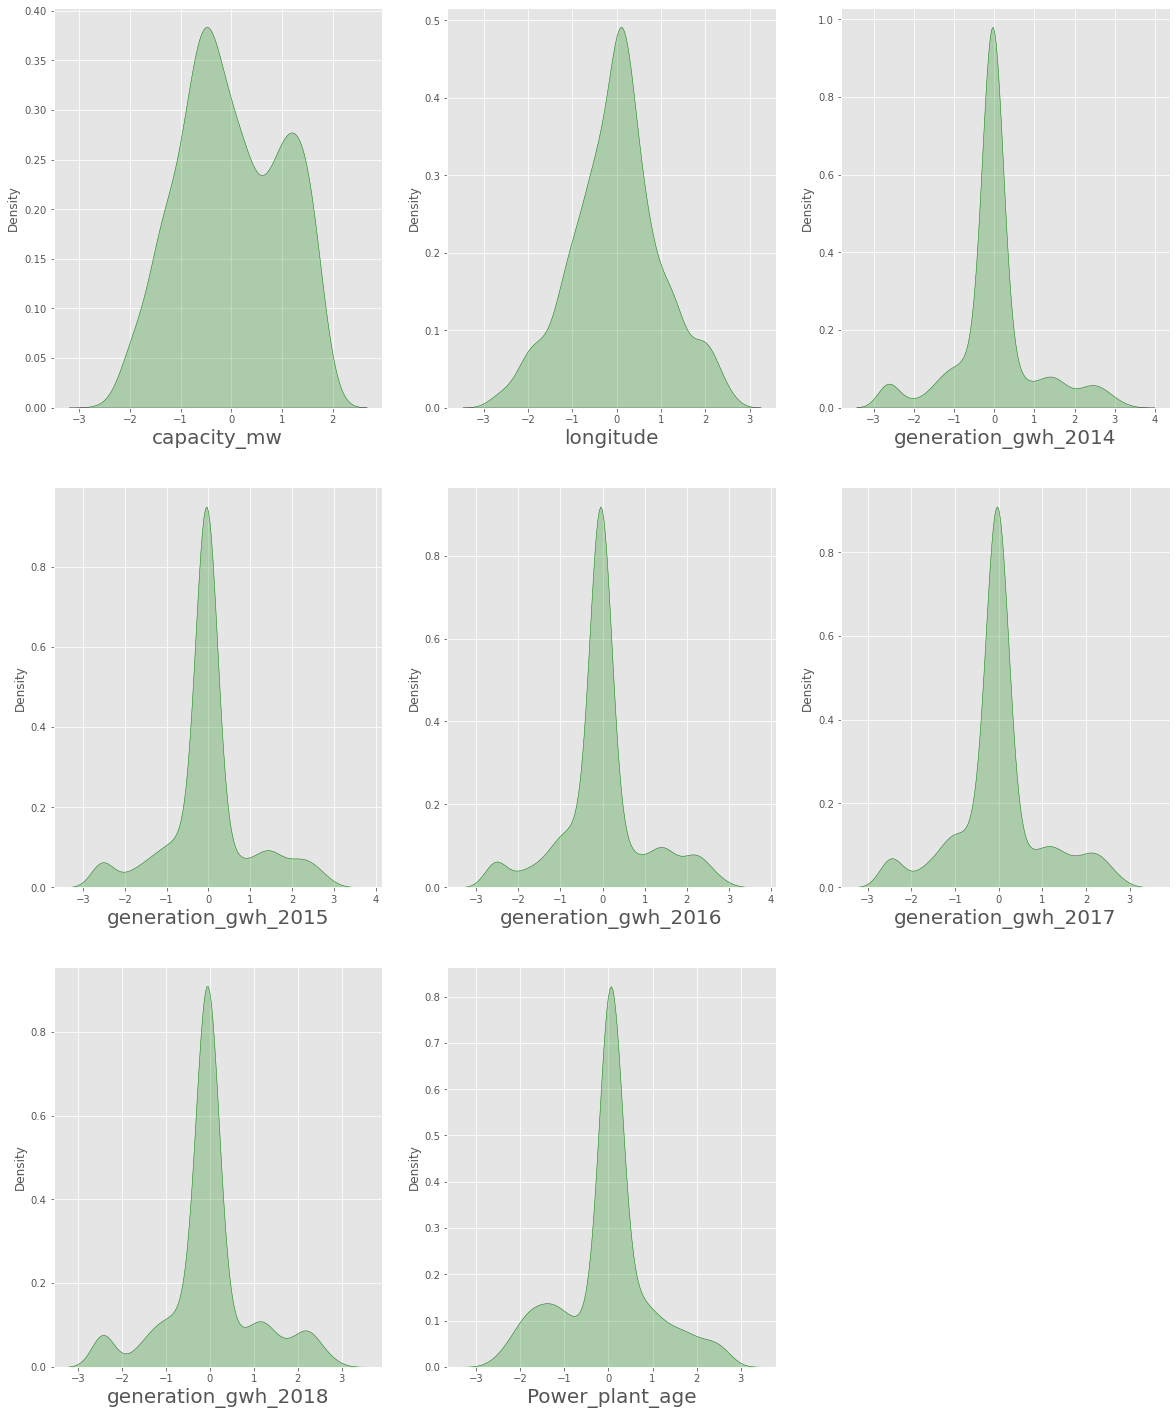

In [73]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Scaling the data using standard scaler:

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

capacity_mw  longitude    source  geolocation_source  \
0      -1.677389  -0.922012  1.397951           -1.036523   
1       0.220284  -0.499829  2.821796            0.407145   
2      -0.274381  -2.377759 -0.529717            0.407145   
3       0.391670   2.430594 -0.507812            0.407145   
4       1.731859   1.261979 -0.507812            0.407145   
..           ...        ...       ...                 ...   
846     1.672840   0.231932 -0.507812            0.407145   
847    -1.598186   0.421592  0.696980           -2.480190   
848    -0.507278  -0.224400 -0.529717            0.407145   
849     0.111201  -0.760624  0.302685            0.407145   
850    -0.741846   0.260758 -0.529717            0.407145   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              -0.044061            -0.049141            -0.046103   
1              -0.044061            -0.049141            -0.046103   
2              -0.044061            -0.049141            -0.046103   
3              -0.268922             0.093773             0.105691   
4               1.426798             2.286603             2.276671   
..                   ...                  ...                  ...   
846            -0.044061            -2.461379            -0.842266   
847            -0.044061            -0.049141            -0.046103   
848            -0.044061            -0.049141            -0.046103   
849            -0.044061            -0.049141            -0.046103   
850            -0.044061            -0.049141            -0.046103   

     generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0              -0.035226            -0.057181        -1.091763  
1              -0.035226            -0.057181         0.048165  
2              -0.035226            -0.057181         0.048165  
3              -0.199692            -0.194159        -0.246636  
4               1.983083             2.347272        -1.767567  
..                   ...                  ...              ...  
846             0.010837            -0.126054        -1.983360  
847            -0.035226            -0.057181         0.048165  
848            -0.035226            -0.057181         0.048165  
849            -0.035226            -0.057181         0.048165  
850            -0.035226            -0.057181         0.048165  

[851 rows x 10 columns]

capacity_mw  longitude    source  geolocation_source  \
0      -1.677389  -0.922012  1.397951           -1.036523   
1       0.220284  -0.499829  2.821796            0.407145   
2      -0.274381  -2.377759 -0.529717            0.407145   
3       0.391670   2.430594 -0.507812            0.407145   
4       1.731859   1.261979 -0.507812            0.407145   
..           ...        ...       ...                 ...   
846     1.672840   0.231932 -0.507812            0.407145   
847    -1.598186   0.421592  0.696980           -2.480190   
848    -0.507278  -0.224400 -0.529717            0.407145   
849     0.111201  -0.760624  0.302685            0.407145   
850    -0.741846   0.260758 -0.529717            0.407145   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              -0.044061            -0.049141            -0.046103   
1              -0.044061            -0.049141            -0.046103   
2              -0.044061            -0.049141            -0.046103   
3              -0.268922             0.093773             0.105691   
4               1.426798             2.286603             2.276671   
..                   ...                  ...                  ...   
846            -0.044061            -2.461379            -0.842266   
847            -0.044061            -0.049141            -0.046103   
848            -0.044061            -0.049141            -0.046103   
849            -0.044061            -0.049141            -0.046103   
850            -0.044061            -0.049141            -0.046103   

     generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0              -0.035226            -0.057181        -1.091763  
1              -0.035226            -0.057181         0.048165  
2              -0.035226            -0.057181         0.048165  
3              -0.199692            -0.194159        -0.246636  
4               1.983083             2.347272        -1.767567  
..                   ...                  ...              ...  
846             0.010837            -0.126054        -1.983360  
847            -0.035226            -0.057181         0.048165  
848            -0.035226            -0.057181         0.048165  
849            -0.035226            -0.057181         0.048165  
850            -0.035226            -0.057181         0.048165  

[851 rows x 10 columns]

capacity_mw  longitude    source  geolocation_source  \
0      -1.677389  -0.922012  1.397951           -1.036523   
1       0.220284  -0.499829  2.821796            0.407145   
2      -0.274381  -2.377759 -0.529717            0.407145   
3       0.391670   2.430594 -0.507812            0.407145   
4       1.731859   1.261979 -0.507812            0.407145   
..           ...        ...       ...                 ...   
846     1.672840   0.231932 -0.507812            0.407145   
847    -1.598186   0.421592  0.696980           -2.480190   
848    -0.507278  -0.224400 -0.529717            0.407145   
849     0.111201  -0.760624  0.302685            0.407145   
850    -0.741846   0.260758 -0.529717            0.407145   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              -0.044061            -0.049141            -0.046103   
1              -0.044061            -0.049141            -0.046103   
2              -0.044061            -0.049141            -0.046103   
3              -0.268922             0.093773             0.105691   
4               1.426798             2.286603             2.276671   
..                   ...                  ...                  ...   
846            -0.044061            -2.461379            -0.842266   
847            -0.044061            -0.049141            -0.046103   
848            -0.044061            -0.049141            -0.046103   
849            -0.044061            -0.049141            -0.046103   
850            -0.044061            -0.049141            -0.046103   

     generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0              -0.035226            -0.057181        -1.091763  
1              -0.035226            -0.057181         0.048165  
2              -0.035226            -0.057181         0.048165  
3              -0.199692            -0.194159        -0.246636  
4               1.983083             2.347272        -1.767567  
..                   ...                  ...              ...  
846             0.010837            -0.126054        -1.983360  
847            -0.035226            -0.057181         0.048165  
848            -0.035226            -0.057181         0.048165  
849            -0.035226            -0.057181         0.048165  
850            -0.035226            -0.057181         0.048165  

[851 rows x 10 columns]

# Checking VIF values

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values             Features
0    1.812831          capacity_mw
1    1.193721            longitude
2    1.413003               source
3    1.590920   geolocation_source
4    3.623098  generation_gwh_2014
5    6.190488  generation_gwh_2015
6    9.960383  generation_gwh_2016
7    9.766254  generation_gwh_2017
8    8.960982  generation_gwh_2018
9    1.155462      Power_plant_age

VIF values             Features
0    1.812831          capacity_mw
1    1.193721            longitude
2    1.413003               source
3    1.590920   geolocation_source
4    3.623098  generation_gwh_2014
5    6.190488  generation_gwh_2015
6    9.960383  generation_gwh_2016
7    9.766254  generation_gwh_2017
8    8.960982  generation_gwh_2018
9    1.155462      Power_plant_age

VIF values             Features
0    1.812831          capacity_mw
1    1.193721            longitude
2    1.413003               source
3    1.590920   geolocation_source
4    3.623098  generation_gwh_2014
5    6.190488  generation_gwh_2015
6    9.960383  generation_gwh_2016
7    9.766254  generation_gwh_2017
8    8.960982  generation_gwh_2018
9    1.155462      Power_plant_age

from the above The VIF value is less than 10 in all the columns which means we don't have multicollinearity problem.

In [76]:
y.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

from the above The data is not balanced, so we have to balance the data by over sampling.

In [77]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [78]:
y.value_counts()


6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

now the data has been balanced

In [79]:
# DataFrame after preprocessing and data cleaning
x.head()

capacity_mw  longitude    source  geolocation_source  generation_gwh_2014  \
0    -1.677389  -0.922012  1.397951           -1.036523            -0.044061   
1     0.220284  -0.499829  2.821796            0.407145            -0.044061   
2    -0.274381  -2.377759 -0.529717            0.407145            -0.044061   
3     0.391670   2.430594 -0.507812            0.407145            -0.268922   
4     1.731859   1.261979 -0.507812            0.407145             1.426798   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            -0.049141            -0.046103            -0.035226   
1            -0.049141            -0.046103            -0.035226   
2            -0.049141            -0.046103            -0.035226   
3             0.093773             0.105691            -0.199692   
4             2.286603             2.276671             1.983083   

   generation_gwh_2018  Power_plant_age  
0            -0.057181        -1.091763  
1            -0.057181         0.048165  
2            -0.057181         0.048165  
3            -0.194159        -0.246636  
4             2.347272        -1.767567

capacity_mw  longitude    source  geolocation_source  generation_gwh_2014  \
0    -1.677389  -0.922012  1.397951           -1.036523            -0.044061   
1     0.220284  -0.499829  2.821796            0.407145            -0.044061   
2    -0.274381  -2.377759 -0.529717            0.407145            -0.044061   
3     0.391670   2.430594 -0.507812            0.407145            -0.268922   
4     1.731859   1.261979 -0.507812            0.407145             1.426798   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            -0.049141            -0.046103            -0.035226   
1            -0.049141            -0.046103            -0.035226   
2            -0.049141            -0.046103            -0.035226   
3             0.093773             0.105691            -0.199692   
4             2.286603             2.276671             1.983083   

   generation_gwh_2018  Power_plant_age  
0            -0.057181        -1.091763  
1            -0.057181         0.048165  
2            -0.057181         0.048165  
3            -0.194159        -0.246636  
4             2.347272        -1.767567

capacity_mw  longitude    source  geolocation_source  generation_gwh_2014  \
0    -1.677389  -0.922012  1.397951           -1.036523            -0.044061   
1     0.220284  -0.499829  2.821796            0.407145            -0.044061   
2    -0.274381  -2.377759 -0.529717            0.407145            -0.044061   
3     0.391670   2.430594 -0.507812            0.407145            -0.268922   
4     1.731859   1.261979 -0.507812            0.407145             1.426798   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            -0.049141            -0.046103            -0.035226   
1            -0.049141            -0.046103            -0.035226   
2            -0.049141            -0.046103            -0.035226   
3             0.093773             0.105691            -0.199692   
4             2.286603             2.276671             1.983083   

   generation_gwh_2018  Power_plant_age  
0            -0.057181        -1.091763  
1            -0.057181         0.048165  
2            -0.057181         0.048165  
3            -0.194159        -0.246636  
4             2.347272        -1.767567

# Finding Best Random State and Accuracy:

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9003496503496503  on Random_state  147
Best accuracy is  0.9003496503496503  on Random_state  147
Best accuracy is  0.9003496503496503  on Random_state  147


# Creating train_test split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

We have created a new train test split using Random State.

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [83]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8898601398601399
[[63  0  0  0  0  2  0  0]
 [ 3 35  6 12  0  2  0  0]
 [ 0  8 63  9  0  2  0  0]
 [ 0  4  4 63  3  0  0  0]
 [ 0  0  0  1 51  0  0  0]
 [ 2  0  5  0  0 71  0  0]
 [ 0  0  0  0  0  0 79  0]
 [ 0  0  0  0  0  0  0 84]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        65
           1       0.74      0.60      0.67        58
           2       0.81      0.77      0.79        82
           3       0.74      0.85      0.79        74
           4       0.94      0.98      0.96        52
           5       0.92      0.91      0.92        78
           6       1.00      1.00      1.00        79
           7       1.00      1.00      1.00        84

    accuracy                           0.89       572
   macro avg       0.89      0.89      0.88       572
weighted avg       0.89      0.89      0.89       572

0.8898601398601399
[[63  0  0  0  0  2  0  0]
 [ 3 35  6 12  0  2  0  0]
 [ 0  8 63  9  0  2  0  0]
 [ 0  4  4 63

Here we are getting 90% accuracy using Decision Tree Classifier.

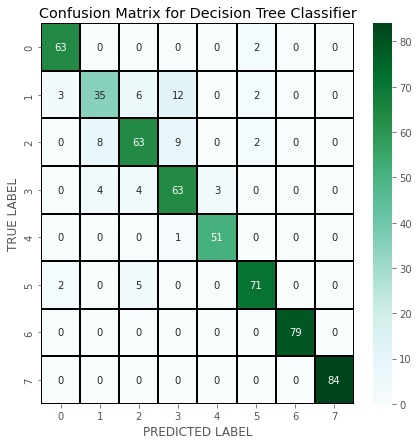

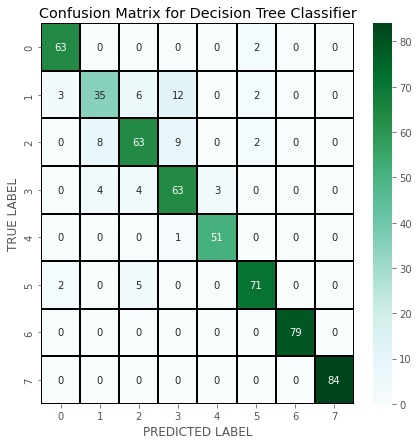

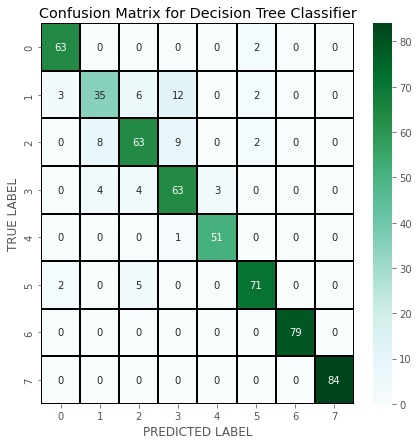

In [84]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifier

In [85]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9353146853146853
[[64  0  0  0  0  1  0  0]
 [ 2 41 10  4  0  1  0  0]
 [ 0  3 71  1  0  7  0  0]
 [ 0  3  2 68  1  0  0  0]
 [ 0  0  0  0 52  0  0  0]
 [ 1  0  1  0  0 76  0  0]
 [ 0  0  0  0  0  0 79  0]
 [ 0  0  0  0  0  0  0 84]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        65
           1       0.87      0.71      0.78        58
           2       0.85      0.87      0.86        82
           3       0.93      0.92      0.93        74
           4       0.98      1.00      0.99        52
           5       0.89      0.97      0.93        78
           6       1.00      1.00      1.00        79
           7       1.00      1.00      1.00        84

    accuracy                           0.94       572
   macro avg       0.93      0.93      0.93       572
weighted avg       0.93      0.94      0.93       572

0.9353146853146853
[[64  0  0  0  0  1  0  0]
 [ 2 41 10  4  0  1  0  0]
 [ 0  3 71  1  0  7  0  0]
 [ 0  3  2 68

The Random Forest Classifier has accuracy 92%.

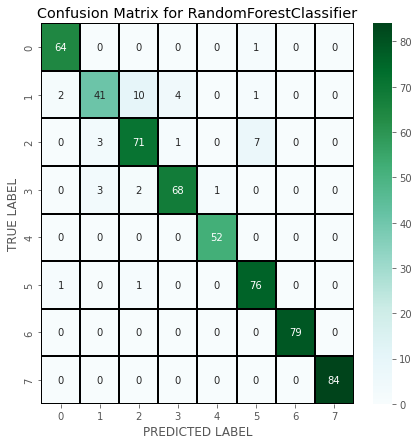

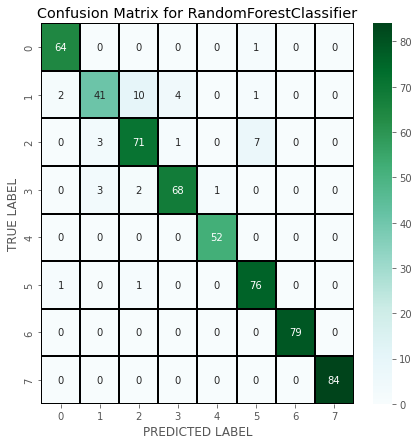

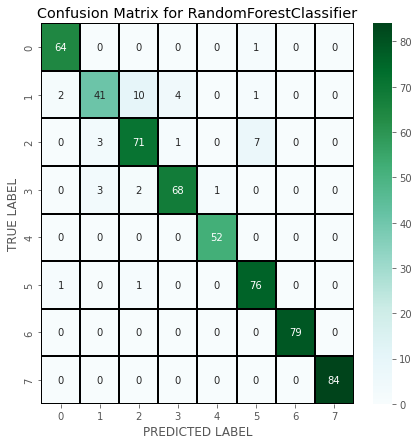

In [86]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Support Vector Machine Classifier

In [87]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8041958041958042
[[55  0  0  0  0  1  0  9]
 [ 6 25 14  2  5  2  0  4]
 [ 0  3 46  7  4 19  0  3]
 [ 0  3  8 50  3  0  0 10]
 [ 0  0  0  0 52  0  0  0]
 [ 2  0  0  0  0 69  0  7]
 [ 0  0  0  0  0  0 79  0]
 [ 0  0  0  0  0  0  0 84]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        65
           1       0.81      0.43      0.56        58
           2       0.68      0.56      0.61        82
           3       0.85      0.68      0.75        74
           4       0.81      1.00      0.90        52
           5       0.76      0.88      0.82        78
           6       1.00      1.00      1.00        79
           7       0.72      1.00      0.84        84

    accuracy                           0.80       572
   macro avg       0.81      0.80      0.79       572
weighted avg       0.81      0.80      0.79       572

0.8041958041958042
[[55  0  0  0  0  1  0  9]
 [ 6 25 14  2  5  2  0  4]
 [ 0  3 46  7  4 19  0  3]
 [ 0  3  8 50

The accuracy using Support Vector Machine Classifier is 80%

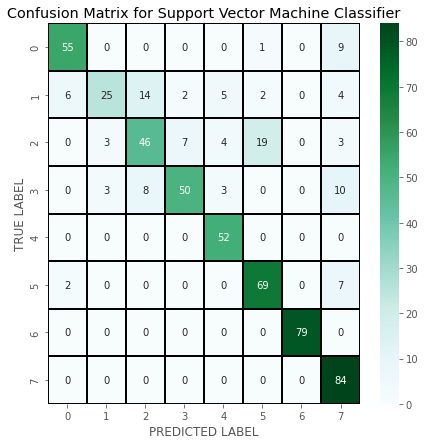

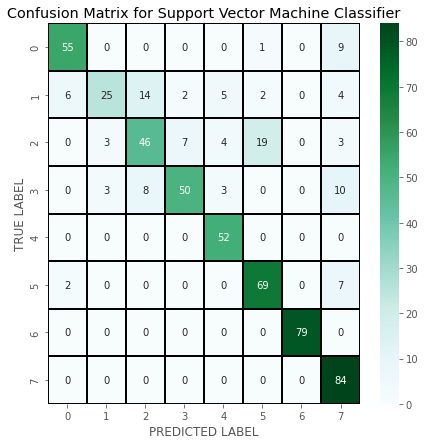

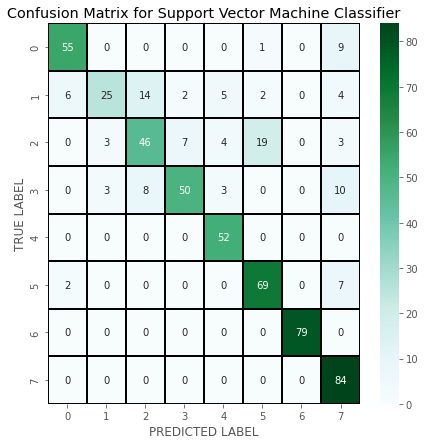

In [88]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# KNeighbors Classifier

In [89]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8583916083916084
[[63  0  0  0  0  1  0  1]
 [ 4 28 11  7  4  2  0  2]
 [ 0  4 63  3  1  9  0  2]
 [ 0  7 12 53  1  0  0  1]
 [ 0  0  0  0 52  0  0  0]
 [ 2  1  4  0  0 71  0  0]
 [ 0  0  0  0  0  0 79  0]
 [ 0  0  0  2  0  0  0 82]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.70      0.48      0.57        58
           2       0.70      0.77      0.73        82
           3       0.82      0.72      0.76        74
           4       0.90      1.00      0.95        52
           5       0.86      0.91      0.88        78
           6       1.00      1.00      1.00        79
           7       0.93      0.98      0.95        84

    accuracy                           0.86       572
   macro avg       0.85      0.85      0.85       572
weighted avg       0.85      0.86      0.85       572

0.8583916083916084
[[63  0  0  0  0  1  0  1]
 [ 4 28 11  7  4  2  0  2]
 [ 0  4 63  3  1  9  0  2]
 [ 0  7 12 53

The accuracy using KNN is 88%

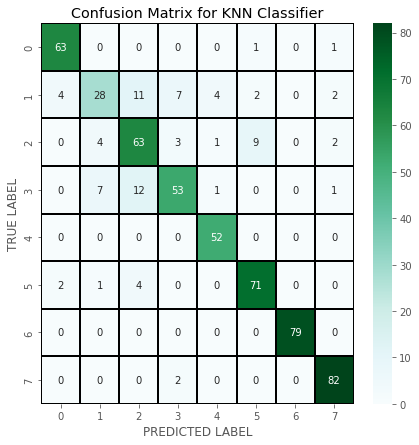

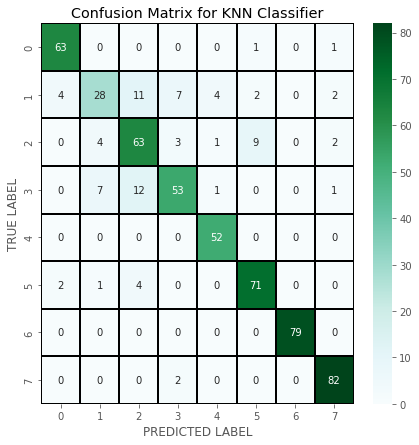

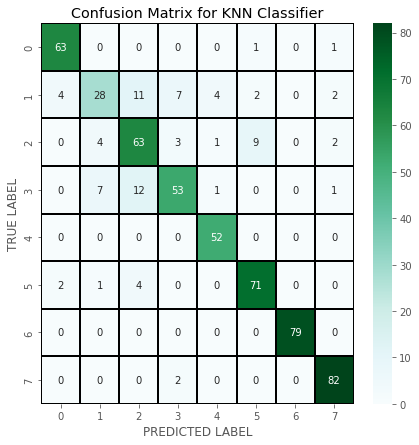

In [90]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Gradient Boosting Classifier

In [91]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.9003496503496503
[[62  2  0  0  0  1  0  0]
 [ 3 37  8  6  2  2  0  0]
 [ 0  3 63  6  1  9  0  0]
 [ 0  2  4 68  0  0  0  0]
 [ 0  0  0  0 52  0  0  0]
 [ 2  2  4  0  0 70  0  0]
 [ 0  0  0  0  0  0 79  0]
 [ 0  0  0  0  0  0  0 84]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.80      0.64      0.71        58
           2       0.80      0.77      0.78        82
           3       0.85      0.92      0.88        74
           4       0.95      1.00      0.97        52
           5       0.85      0.90      0.88        78
           6       1.00      1.00      1.00        79
           7       1.00      1.00      1.00        84

    accuracy                           0.90       572
   macro avg       0.90      0.90      0.90       572
weighted avg       0.90      0.90      0.90       572

0.9003496503496503
[[62  2  0  0  0  1  0  0]
 [ 3 37  8  6  2  2  0  0]
 [ 0  3 63  6  1  9  0  0]
 [ 0  2  4 68

The accuracy using Gradient Boosting Classifier is 90%.

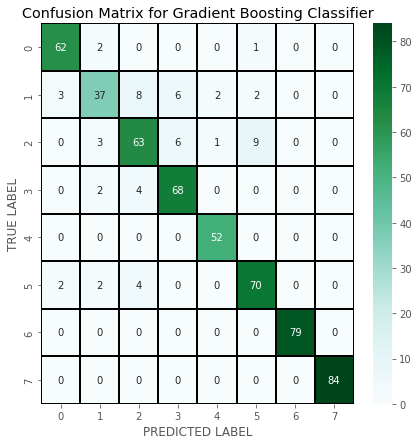

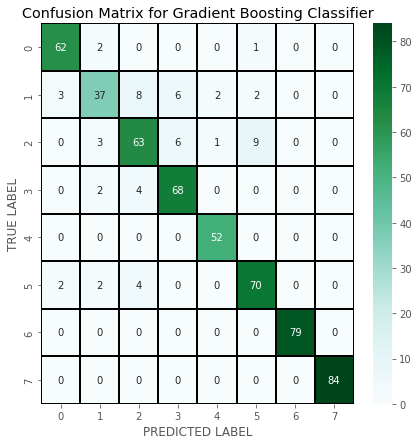

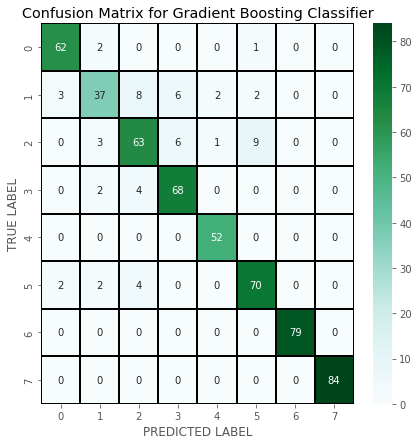

In [92]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Checking the Cross Validation Score

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8744840447575631
0.8744840447575631
0.8744840447575631


In [95]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.9180715568448681
0.9180715568448681
0.9180715568448681


In [96]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.7972717226136207
0.7972717226136207
0.7972717226136207


In [97]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.8524216051940876
0.8524216051940876
0.8524216051940876


In [98]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.9028387898881061
0.9028387898881061
0.9028387898881061


from the above By looking into the difference of Model accuracy and cross validation score GradientBoosting classifier is my best model.

# Hyperparameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
#Gradient Boosting Classifier 
parameters = {'criterion':['friedman_mse','mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [101]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
primary_fuel =GradientBoostingClassifier (criterion='mae', max_depth=8, max_features='sqrt', n_estimators=200)
primary_fuel.fit(x_train, y_train)
pred = primary_fuel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

# ROC AUC Curve:

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


classifier = OneVsRestClassifier(primary_fuel)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

#Binarize the output
y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

Saving the model:

In [ ]:
#Saving the model as .pkl file
import joblib
joblib.dump(primary_fuel,"power_plant_primary_fuel.pkl")